<a href="https://colab.research.google.com/github/pplateena/MMPAI-NULP/blob/main/l1_MMPAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from scipy import stats

warnings.filterwarnings('ignore')

#1.	–û–±—Ä–∞—Ç–∏ –ø—É–±–ª—ñ—á–Ω–∏–π –¥–∞—Ç–∞—Å–µ—Ç (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, –¥–ª—è –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó —á–∏ —Ä–µ–≥—Ä–µ—Å—ñ—ó –∑ Kaggle –∞–±–æ UCI Machine Learning Repository).
–Ø –æ–±—Ä–∞–≤ –¥–∞—Ç–∞—Å–µ—Ç https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# 2.	–í–∏–∫–æ–Ω–∞—Ç–∏ Exploratory Data Analysis (EDA): –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è —Ä–æ–∑–ø–æ–¥—ñ–ª—É –æ–∑–Ω–∞–∫, –º–∞—Ç—Ä–∏—Ü—ñ –∫–æ—Ä–µ–ª—è—Ü—ñ–π, –≤–∏—è–≤–ª–µ–Ω–Ω—è –∞–Ω–æ–º–∞–ª—ñ–π.

In [3]:
# 3.1 –ë–∞–∑–æ–≤–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
print("\n--- –ë–∞–∑–æ–≤–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ ---")
print(df.describe())

# 3.2 –Ü–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—è –ø—Ä–æ —Ç–∏–ø–∏ –¥–∞–Ω–∏—Ö —Ç–∞ –ø—Ä–æ–ø—É—â–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è
print("\n--- –Ü–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—è –ø—Ä–æ –¥–∞–Ω—ñ ---")
print(df.info())



--- –ë–∞–∑–æ–≤–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

--- –Ü–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—è –ø—Ä–æ –¥–∞–

## –û–ø–∏—Å –∑–º—ñ–Ω–Ω–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç—É Titanic

| –ó–º—ñ–Ω–Ω–∞ | –û–ø–∏—Å | –ó–Ω–∞—á–µ–Ω–Ω—è |
|--------|------|----------|
| **survival** | –í–∏–∂–∏–≤–∞–Ω–Ω—è | 0 = –ù—ñ, 1 = –¢–∞–∫ |
| **pclass** | –ö–ª–∞—Å –∫–≤–∏—Ç–∫–∞ | 1 = 1-–π –∫–ª–∞—Å, 2 = 2-–π –∫–ª–∞—Å, 3 = 3-–π –∫–ª–∞—Å |
| **sex** | –°—Ç–∞—Ç—å | male/female |
| **age** | –í—ñ–∫ | –í—ñ–∫ —É —Ä–æ–∫–∞—Ö |
| **sibsp** | –ö—ñ–ª—å–∫—ñ—Å—Ç—å –±—Ä–∞—Ç—ñ–≤/—Å–µ—Å—Ç–µ—Ä/–ø–æ–¥—Ä—É–∂–∂—è –Ω–∞ –±–æ—Ä—Ç—É | –ß–∏—Å–ª–æ–≤–µ –∑–Ω–∞—á–µ–Ω–Ω—è |
| **parch** | –ö—ñ–ª—å–∫—ñ—Å—Ç—å –±–∞—Ç—å–∫—ñ–≤/–¥—ñ—Ç–µ–π –Ω–∞ –±–æ—Ä—Ç—É | –ß–∏—Å–ª–æ–≤–µ –∑–Ω–∞—á–µ–Ω–Ω—è |
| **ticket** | –ù–æ–º–µ—Ä –∫–≤–∏—Ç–∫–∞ | –¢–µ–∫—Å—Ç–æ–≤–∏–π/—á–∏—Å–ª–æ–≤–∏–π —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫–∞—Ç–æ—Ä |
| **fare** | –¢–∞—Ä–∏—Ñ –ø–∞—Å–∞–∂–∏—Ä–∞ | –ß–∏—Å–ª–æ–≤–µ –∑–Ω–∞—á–µ–Ω–Ω—è (—Ü—ñ–Ω–∞ –∫–≤–∏—Ç–∫–∞) |
| **cabin** | –ù–æ–º–µ—Ä –∫–∞—é—Ç–∏ | –¢–µ–∫—Å—Ç–æ–≤–∏–π —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫–∞—Ç–æ—Ä |
| **embarked** | –ü–æ—Ä—Ç –ø–æ—Å–∞–¥–∫–∏ | C = –®–µ—Ä–±—É—Ä, Q = –ö–≤—ñ–Ω—Å—Ç–∞—É–Ω, S = –°–∞—É—Ç–≥–µ–º–ø—Ç–æ–Ω |

In [4]:
print("\n--- –ü—Ä–æ–ø—É—â–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è ---")
missing_values = df.isnull().sum()
print("–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å –ø–æ —Å—Ç–æ–≤–ø—Ü—è–º:")
for col, missing in missing_values.items():
    if missing > 0:
        percentage = (missing / len(df)) * 100
        print(f"  {col}: {missing} ({percentage:.1f}%)")


--- –ü—Ä–æ–ø—É—â–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è ---
–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å –ø–æ —Å—Ç–æ–≤–ø—Ü—è–º:
  Age: 177 (19.9%)
  Cabin: 687 (77.1%)
  Embarked: 2 (0.2%)


–ü—Ä–æ–º—ñ–∂–Ω—ñ –≤–∏—Å–Ω–æ–≤–∫–∏:
* –Ω–µ–º–∞—î –¥–∞–Ω–∏—Ö 19,9% –ø–æ –≤—ñ–∫—É –≤–∞–≥–æ–º–æ—ó –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –ø–∞—Å–∞–∂–∏—Ä—ñ–≤(*–í–∞–∂–ª–∏–≤–æ*)
* –Ω–µ–º–∞—î 77,1% –¥–∞–Ω–∏—Ö –ø–æ –∫–∞–±—ñ–Ω–∞—Ö –ø–∞—Å–∞–∂–∏—Ä—ñ–≤, —Ü—é –∑–º—ñ–Ω–Ω—É —à–≤–∏–¥—à–µ –∑–∞ –≤—Å–µ –ø—Ä–∏–π–¥–µ—Ç—å—Å—è —É–ø—É—Å—Ç–∏—Ç–∏(*–ù–µ –≤–∞–∂–ª–∏–≤–æ*)
* –ø—Ä–æ–ø—É—â–µ–Ω–æ 0.2% –∑–Ω–∞—á–µ–Ω—å –ø–æ –ø–æ—Ä—Ç—É –ø–æ—Å–∞–¥–∫–∏ –ø–∞—Å–∞–∂–∏—Ä—ñ–≤(*–ù–µ –≤–∞–∂–ª–∏–≤–æ*)

In [5]:
# –†–æ–∑–ø–æ–¥—ñ–ª —Ü—ñ–ª—å–æ–≤–æ—ó –∑–º—ñ–Ω–Ω–æ—ó (–≤–∏–∂–∏–≤–∞–Ω–Ω—è)
print("\n--- –†–æ–∑–ø–æ–¥—ñ–ª —Ü—ñ–ª—å–æ–≤–æ—ó –∑–º—ñ–Ω–Ω–æ—ó (Survived) ---")
survival_counts = df['Survived'].value_counts()
print(f"–ó–∞–≥–∏–Ω—É–ª–∏ (0): {survival_counts[0]} ({survival_counts[0]/len(df)*100:.1f}%)")
print(f"–í–∏–∂–∏–ª–∏ (1): {survival_counts[1]} ({survival_counts[1]/len(df)*100:.1f}%)")


--- –†–æ–∑–ø–æ–¥—ñ–ª —Ü—ñ–ª—å–æ–≤–æ—ó –∑–º—ñ–Ω–Ω–æ—ó (Survived) ---
–ó–∞–≥–∏–Ω—É–ª–∏ (0): 549 (61.6%)
–í–∏–∂–∏–ª–∏ (1): 342 (38.4%)


–ü—Ä–æ–º—ñ–∂–Ω—ñ –≤–∏—Å–Ω–æ–≤–∫–∏:
* –†–æ–∑–ø–æ–¥—ñ–ª target variable, –º–∞–π–∂–µ —Ä—ñ–≤–Ω–∏–π, —Ü–µ —Ö–æ—Ä–æ—à–∏–π –∑–Ω–∞–∫, –ø—Ä–∏–π–¥–µ—Ç—å—Å—è —Ä–æ–±–∏—Ç–∏ –º—ñ–Ω—ñ–º—É–º –∑–º—ñ–Ω –ø—Ä–∏ —Ä–æ–∑–ø–æ–¥—ñ–ª—ñ –¥–∞–Ω–∏—Ö —É –º–∞–π–±—É—Ç–Ω—å–æ–º—É


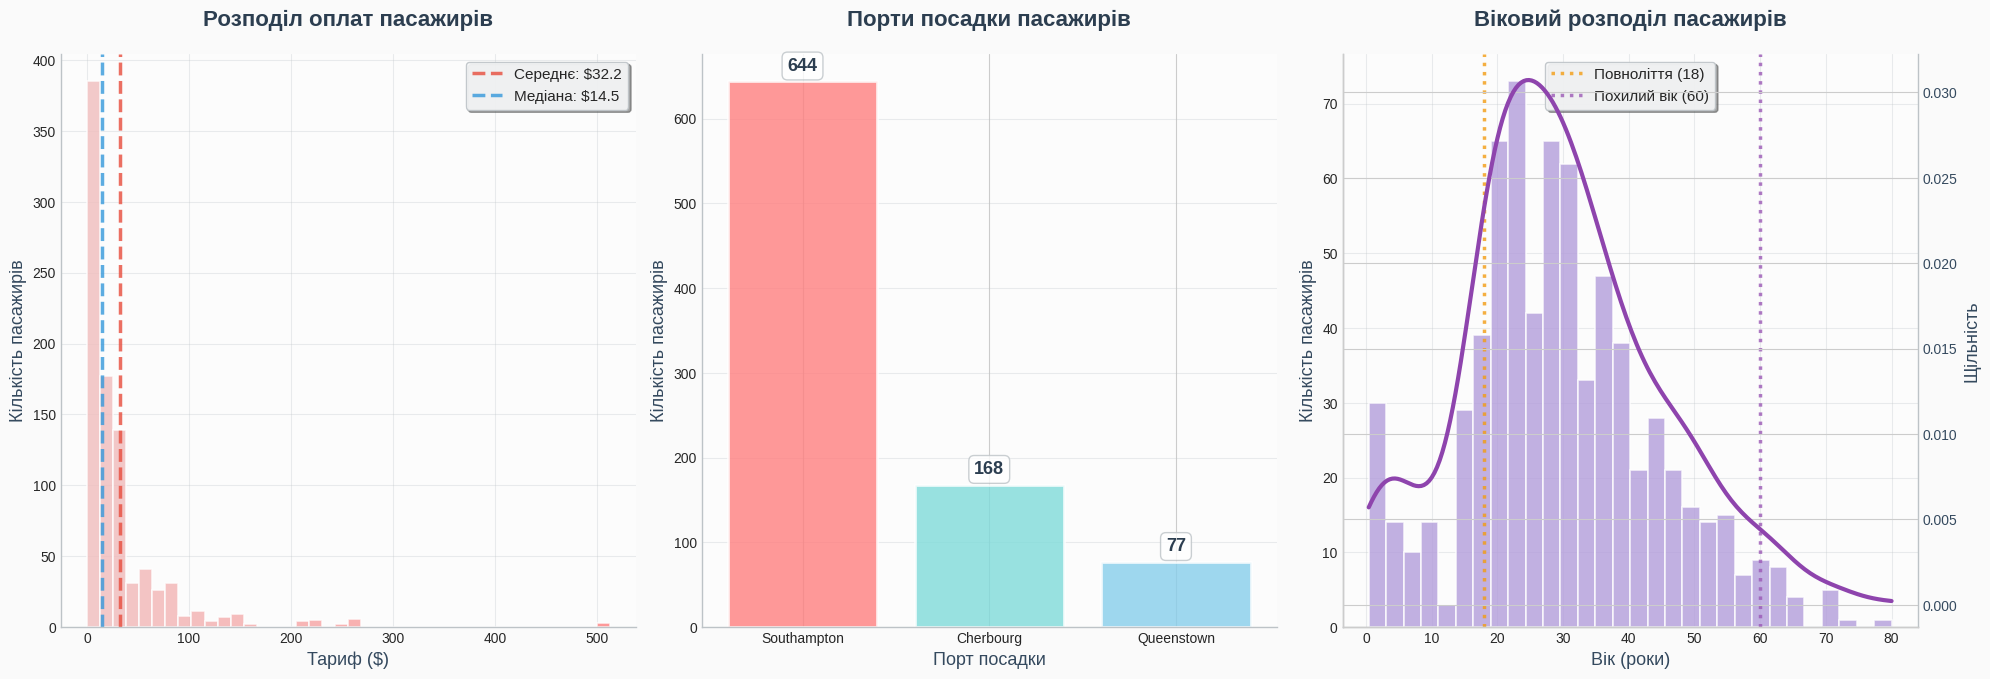

In [6]:
# –ù–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è —Å—Ç–∏–ª—é
plt.style.use('seaborn-v0_8-whitegrid')

# –û—Ä–≥–∞–Ω—ñ–∑–æ–≤–∞–Ω—ñ –∫–æ–ª—å–æ—Ä–∏
COLORS = {
    # –û—Å–Ω–æ–≤–Ω—ñ –∫–æ–ª—å–æ—Ä–∏ –¥–ª—è –≥—Ä–∞—Ñ—ñ–∫—ñ–≤
    'coral': '#FF7F7F',
    'mint': '#7FDBDA',
    'sky': '#87CEEB',
    'lavender': '#B39DDB',

    # –°—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω—ñ –ª—ñ–Ω—ñ—ó
    'mean_line': '#E74C3C',
    'median_line': '#3498DB',
    'age_adult': '#F39C12',
    'age_senior': '#9B59B6',
    'kde_curve': '#8E44AD',

    # –§–æ–Ω–æ–≤—ñ –∫–æ–ª—å–æ—Ä–∏
    'bg_main': '#FAFAFA',
    'bg_plot': '#FCFCFC',
    'grid': '#BDC3C7',
    'text_main': '#2C3E50',
    'text_secondary': '#34495E',
    'legend_bg': '#F8F9FA'
}

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è –≥—Ä–∞—Ñ—ñ–∫—ñ–≤
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.patch.set_facecolor(COLORS['bg_main'])

# 1. –†–æ–∑–ø–æ–¥—ñ–ª –æ–ø–ª–∞—Ç
axes[0].set_facecolor(COLORS['bg_plot'])
n, bins, patches = axes[0].hist(df['Fare'], bins=40, alpha=0.8, edgecolor='white', linewidth=1.2)

base_color = np.array([1.0, 0.5, 0.5])
for i, patch in enumerate(patches):
    intensity = 0.4 + 0.6 * (i / len(patches))
    color = base_color * intensity + (1 - intensity) * 0.9
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

axes[0].set_title('–†–æ–∑–ø–æ–¥—ñ–ª –æ–ø–ª–∞—Ç –ø–∞—Å–∞–∂–∏—Ä—ñ–≤', fontsize=16, fontweight='600',
                  color=COLORS['text_main'], pad=20)
axes[0].set_xlabel('–¢–∞—Ä–∏—Ñ ($)', fontsize=13, color=COLORS['text_secondary'], fontweight='500')
axes[0].set_ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–∞—Å–∞–∂–∏—Ä—ñ–≤', fontsize=13, color=COLORS['text_secondary'], fontweight='500')

mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()
axes[0].axvline(mean_fare, color=COLORS['mean_line'], linestyle='--', linewidth=2.5,
                label=f'–°–µ—Ä–µ–¥–Ω—î: ${mean_fare:.1f}', alpha=0.8)
axes[0].axvline(median_fare, color=COLORS['median_line'], linestyle='--', linewidth=2.5,
                label=f'–ú–µ–¥—ñ–∞–Ω–∞: ${median_fare:.1f}', alpha=0.8)

legend = axes[0].legend(fontsize=11, frameon=True, shadow=True, fancybox=True, framealpha=0.9)
legend.get_frame().set_facecolor(COLORS['legend_bg'])
legend.get_frame().set_edgecolor(COLORS['grid'])

axes[0].grid(True, alpha=0.3, color=COLORS['grid'], linestyle='-', linewidth=0.8)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_color(COLORS['grid'])
axes[0].spines['bottom'].set_color(COLORS['grid'])

# 2. –ü–æ—Ä—Ç–∏ –ø–æ—Å–∞–¥–∫–∏
axes[1].set_facecolor(COLORS['bg_plot'])
embarked_counts = df['Embarked'].value_counts()
port_names = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
nice_names = [port_names.get(port, port) for port in embarked_counts.index]

bars = axes[1].bar(nice_names, embarked_counts.values,
                   color=[COLORS['coral'], COLORS['mint'], COLORS['sky']],
                   alpha=0.8, edgecolor='white', linewidth=2)

for bar, value in zip(bars, embarked_counts.values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 8,
                f'{value}', ha='center', va='bottom', fontsize=13,
                color=COLORS['text_main'], fontweight='600',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor=COLORS['grid']))

axes[1].set_title('–ü–æ—Ä—Ç–∏ –ø–æ—Å–∞–¥–∫–∏ –ø–∞—Å–∞–∂–∏—Ä—ñ–≤', fontsize=16, fontweight='600',
                  color=COLORS['text_main'], pad=20)
axes[1].set_xlabel('–ü–æ—Ä—Ç –ø–æ—Å–∞–¥–∫–∏', fontsize=13, color=COLORS['text_secondary'], fontweight='500')
axes[1].set_ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–∞—Å–∞–∂–∏—Ä—ñ–≤', fontsize=13, color=COLORS['text_secondary'], fontweight='500')

axes[1].grid(True, alpha=0.3, color=COLORS['grid'], axis='y', linestyle='-', linewidth=0.8)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_color(COLORS['grid'])
axes[1].spines['bottom'].set_color(COLORS['grid'])

# 3. –í—ñ–∫–æ–≤–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª
axes[2].set_facecolor(COLORS['bg_plot'])
axes[2].hist(df['Age'].dropna(), bins=30, alpha=0.8,
             color=COLORS['lavender'], edgecolor='white', linewidth=1.2)


age_data = df['Age'].dropna()
density = stats.gaussian_kde(age_data)
x_range = np.linspace(age_data.min(), age_data.max(), 200)

ax2_twin = axes[2].twinx()
ax2_twin.plot(x_range, density(x_range), color=COLORS['kde_curve'], linewidth=3)
ax2_twin.set_ylabel('–©—ñ–ª—å–Ω—ñ—Å—Ç—å', fontsize=13, color=COLORS['text_secondary'], fontweight='500')
ax2_twin.tick_params(colors=COLORS['text_secondary'])
ax2_twin.spines['right'].set_color(COLORS['grid'])
ax2_twin.spines['top'].set_visible(False)

axes[2].set_title('–í—ñ–∫–æ–≤–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª –ø–∞—Å–∞–∂–∏—Ä—ñ–≤', fontsize=16, fontweight='600',
                  color=COLORS['text_main'], pad=20)
axes[2].set_xlabel('–í—ñ–∫ (—Ä–æ–∫–∏)', fontsize=13, color=COLORS['text_secondary'], fontweight='500')
axes[2].set_ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–∞—Å–∞–∂–∏—Ä—ñ–≤', fontsize=13, color=COLORS['text_secondary'], fontweight='500')

axes[2].axvline(18, color=COLORS['age_adult'], linestyle=':', linewidth=2.5,
                label='–ü–æ–≤–Ω–æ–ª—ñ—Ç—Ç—è (18)', alpha=0.8)
axes[2].axvline(60, color=COLORS['age_senior'], linestyle=':', linewidth=2.5,
                label='–ü–æ—Ö–∏–ª–∏–π –≤—ñ–∫ (60)', alpha=0.8)

legend2 = axes[2].legend(fontsize=11, frameon=True, shadow=True, fancybox=True, framealpha=0.9)
legend2.get_frame().set_facecolor(COLORS['legend_bg'])
legend2.get_frame().set_edgecolor(COLORS['grid'])

axes[2].grid(True, alpha=0.3, color=COLORS['grid'], linestyle='-', linewidth=0.8)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].spines['left'].set_color(COLORS['grid'])
axes[2].spines['bottom'].set_color(COLORS['grid'])

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

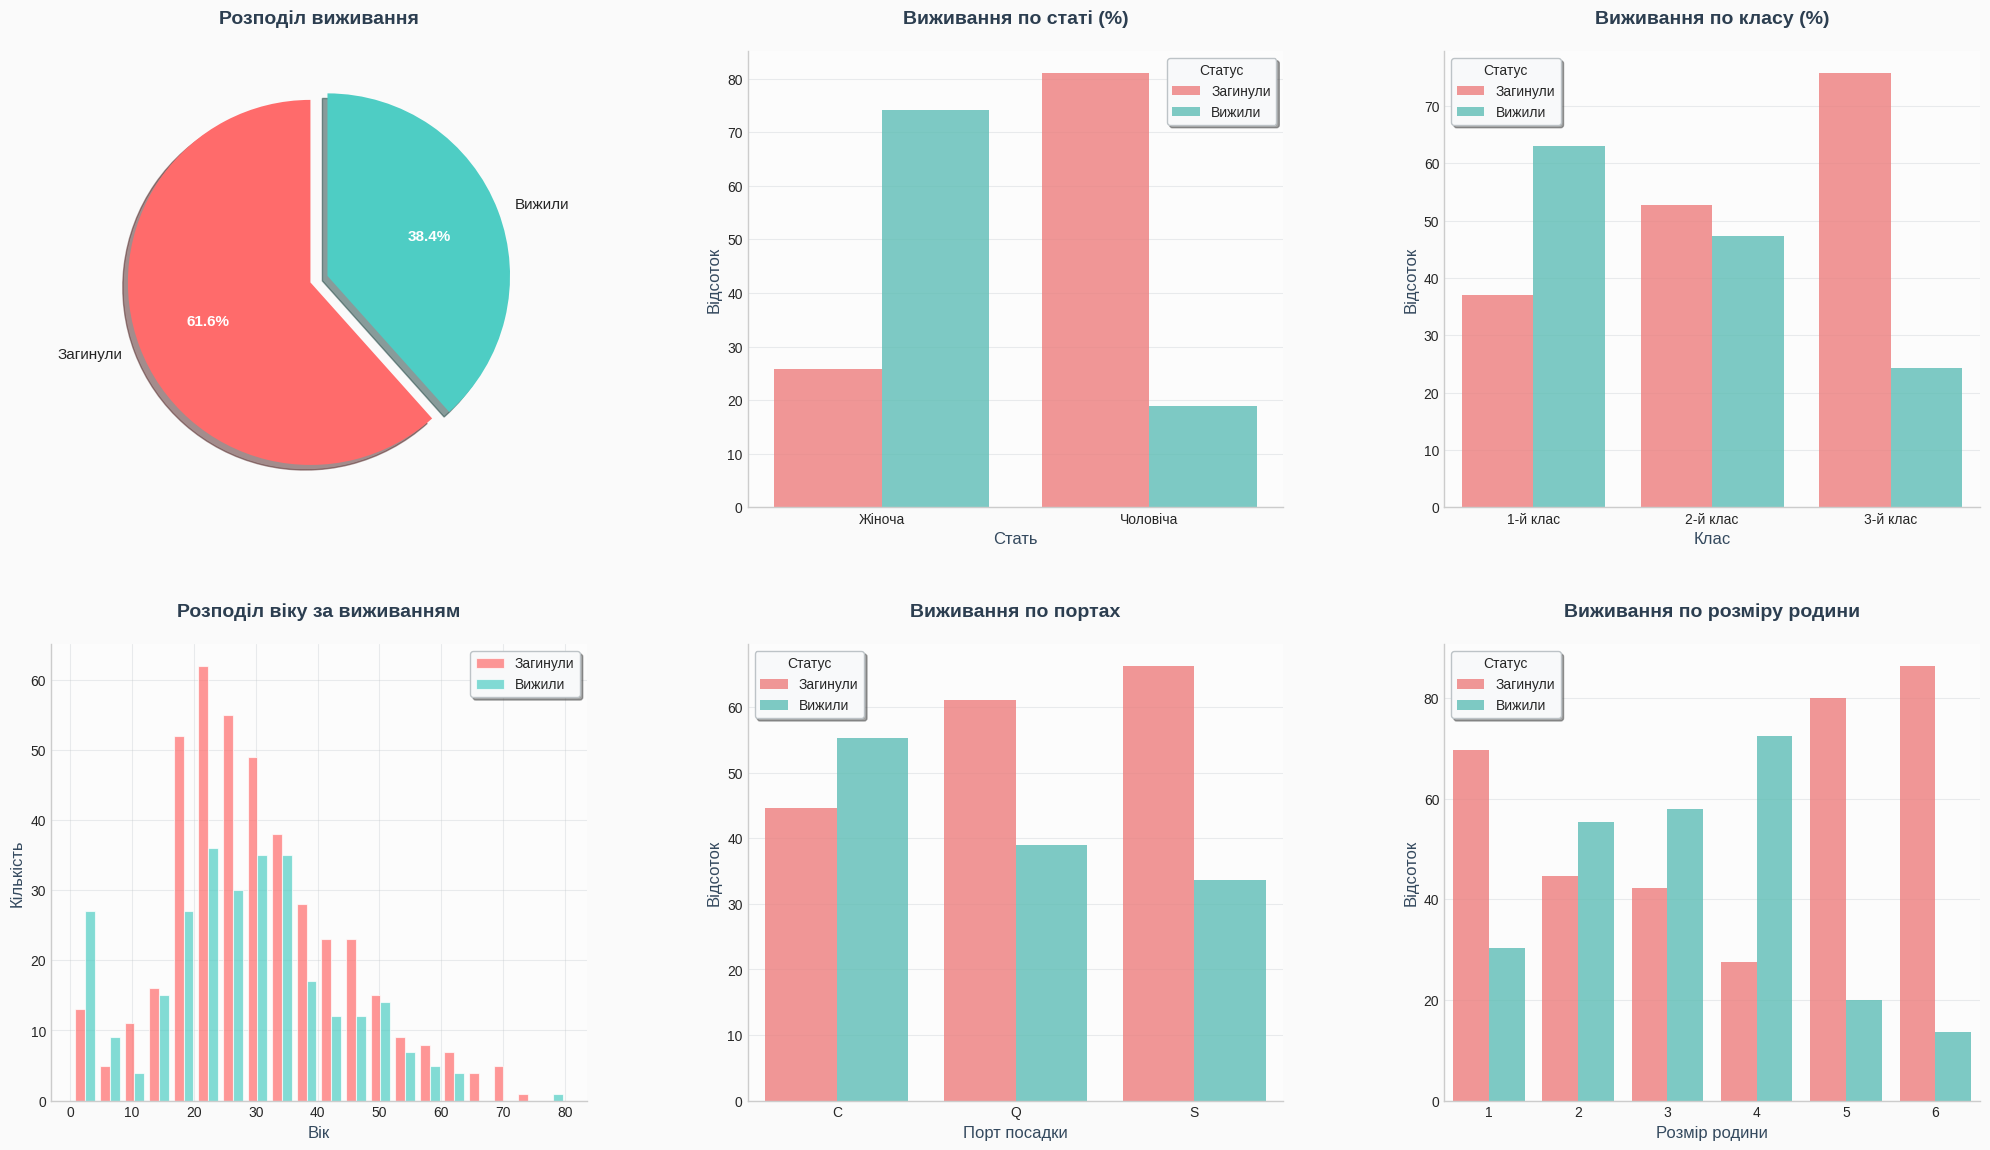

In [7]:
# –ù–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è —Å—Ç–∏–ª—é
plt.style.use('seaborn-v0_8-whitegrid')

# –ö–æ–ª—å–æ—Ä–∏ –¥–ª—è –≥—Ä–∞—Ñ—ñ–∫—ñ–≤ –≤–∏–∂–∏–≤–∞–Ω–Ω—è
SURVIVAL_COLORS = {
    'died': '#FF6B6B',          # –ß–µ—Ä–≤–æ–Ω–∏–π –¥–ª—è –∑–∞–≥–∏–±–ª–∏—Ö
    'survived': '#4ECDC4',      # –ë—ñ—Ä—é–∑–æ–≤–∏–π –¥–ª—è —Ç–∏—Ö —â–æ –≤–∏–∂–∏–ª–∏
    'bg_main': '#FAFAFA',
    'bg_plot': '#FCFCFC',
    'grid': '#BDC3C7',
    'text_main': '#2C3E50',
    'text_secondary': '#34495E',
    'legend_bg': '#F8F9FA'
}

# –ü—ñ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–∏—Ö
survival_counts = df['Survived'].value_counts()

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è –≥—Ä–∞—Ñ—ñ–∫—ñ–≤ 2x3 (—è–∫ –≤ –æ—Ä–∏–≥—ñ–Ω–∞–ª—å–Ω–æ–º—É –∫–æ–¥—ñ)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.patch.set_facecolor(SURVIVAL_COLORS['bg_main'])
# fig.suptitle('–ê–Ω–∞–ª—ñ–∑ –≤–∏–∂–∏–≤–∞–Ω–Ω—è –ø–∞—Å–∞–∂–∏—Ä—ñ–≤ –¢–∏—Ç–∞–Ω—ñ–∫–∞',
#              fontsize=20, fontweight='600', color=SURVIVAL_COLORS['text_main'], y=0.95)

# 1. Pie chart —Ä–æ–∑–ø–æ–¥—ñ–ª—É –≤–∏–∂–∏–≤–∞–Ω–Ω—è
axes[0,0].set_facecolor(SURVIVAL_COLORS['bg_plot'])
wedges, texts, autotexts = axes[0,0].pie(survival_counts.values,
                                         labels=['–ó–∞–≥–∏–Ω—É–ª–∏', '–í–∏–∂–∏–ª–∏'],
                                         autopct='%1.1f%%',
                                         colors=[SURVIVAL_COLORS['died'], SURVIVAL_COLORS['survived']],
                                         startangle=90,
                                         explode=(0.05, 0.05),
                                         shadow=True,
                                         textprops={'fontsize': 11, 'fontweight': '500'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

axes[0,0].set_title('–†–æ–∑–ø–æ–¥—ñ–ª –≤–∏–∂–∏–≤–∞–Ω–Ω—è', fontsize=14, fontweight='600',
                    color=SURVIVAL_COLORS['text_main'], pad=20)

# 2. –í–∏–∂–∏–≤–∞–Ω–Ω—è –ø–æ —Å—Ç–∞—Ç—ñ (bar chart)
axes[0,1].set_facecolor(SURVIVAL_COLORS['bg_plot'])
survival_by_sex = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100

# –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ seaborn –¥–ª—è –∫—Ä–∞—Å–∏–≤–æ–≥–æ bar plot
sex_data = survival_by_sex.reset_index().melt(id_vars='Sex', var_name='Survived', value_name='Percentage')
sex_data['Status'] = sex_data['Survived'].map({0: '–ó–∞–≥–∏–Ω—É–ª–∏', 1: '–í–∏–∂–∏–ª–∏'})

sns.barplot(data=sex_data, x='Sex', y='Percentage', hue='Status', ax=axes[0,1],
            palette=[SURVIVAL_COLORS['died'], SURVIVAL_COLORS['survived']], alpha=0.8)

axes[0,1].set_title('–í–∏–∂–∏–≤–∞–Ω–Ω—è –ø–æ —Å—Ç–∞—Ç—ñ (%)', fontsize=14, fontweight='600',
                    color=SURVIVAL_COLORS['text_main'], pad=20)
axes[0,1].set_xlabel('–°—Ç–∞—Ç—å', fontsize=12, color=SURVIVAL_COLORS['text_secondary'])
axes[0,1].set_ylabel('–í—ñ–¥—Å–æ—Ç–æ–∫', fontsize=12, color=SURVIVAL_COLORS['text_secondary'])
axes[0,1].set_xticklabels(['–ñ—ñ–Ω–æ—á–∞', '–ß–æ–ª–æ–≤—ñ—á–∞'])

legend1 = axes[0,1].legend(title='–°—Ç–∞—Ç—É—Å', fontsize=10, frameon=True, shadow=True)
legend1.get_frame().set_facecolor(SURVIVAL_COLORS['legend_bg'])
legend1.get_frame().set_edgecolor(SURVIVAL_COLORS['grid'])

axes[0,1].grid(True, alpha=0.3, color=SURVIVAL_COLORS['grid'], axis='y')
axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)

# 3. –í–∏–∂–∏–≤–∞–Ω–Ω—è –ø–æ –∫–ª–∞—Å—É (bar chart)
axes[0,2].set_facecolor(SURVIVAL_COLORS['bg_plot'])
survival_by_class = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100

# –ü—ñ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–∏—Ö –¥–ª—è seaborn
class_data = survival_by_class.reset_index().melt(id_vars='Pclass', var_name='Survived', value_name='Percentage')
class_data['Status'] = class_data['Survived'].map({0: '–ó–∞–≥–∏–Ω—É–ª–∏', 1: '–í–∏–∂–∏–ª–∏'})

sns.barplot(data=class_data, x='Pclass', y='Percentage', hue='Status', ax=axes[0,2],
            palette=[SURVIVAL_COLORS['died'], SURVIVAL_COLORS['survived']], alpha=0.8)

axes[0,2].set_title('–í–∏–∂–∏–≤–∞–Ω–Ω—è –ø–æ –∫–ª–∞—Å—É (%)', fontsize=14, fontweight='600',
                    color=SURVIVAL_COLORS['text_main'], pad=20)
axes[0,2].set_xlabel('–ö–ª–∞—Å', fontsize=12, color=SURVIVAL_COLORS['text_secondary'])
axes[0,2].set_ylabel('–í—ñ–¥—Å–æ—Ç–æ–∫', fontsize=12, color=SURVIVAL_COLORS['text_secondary'])
axes[0,2].set_xticklabels(['1-–π –∫–ª–∞—Å', '2-–π –∫–ª–∞—Å', '3-–π –∫–ª–∞—Å'])

legend2 = axes[0,2].legend(title='–°—Ç–∞—Ç—É—Å', fontsize=10, frameon=True, shadow=True)
legend2.get_frame().set_facecolor(SURVIVAL_COLORS['legend_bg'])
legend2.get_frame().set_edgecolor(SURVIVAL_COLORS['grid'])

axes[0,2].grid(True, alpha=0.3, color=SURVIVAL_COLORS['grid'], axis='y')
axes[0,2].spines['top'].set_visible(False)
axes[0,2].spines['right'].set_visible(False)

# 4. –í—ñ–∫–æ–≤–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª –∑–∞ –≤–∏–∂–∏–≤–∞–Ω–Ω—è–º (overlapping histograms)
axes[1,0].set_facecolor(SURVIVAL_COLORS['bg_plot'])
ages_survived = df[df['Survived']==1]['Age'].dropna()
ages_died = df[df['Survived']==0]['Age'].dropna()

# –°—Ç–≤–æ—Ä—é—î–º–æ –∫—Ä–∞—Å–∏–≤—ñ –Ω–∞–∫–ª–∞–¥–µ–Ω—ñ –≥—ñ—Å—Ç–æ–≥—Ä–∞–º–∏
axes[1,0].hist([ages_died, ages_survived], bins=20, alpha=0.7,
               label=['–ó–∞–≥–∏–Ω—É–ª–∏', '–í–∏–∂–∏–ª–∏'],
               color=[SURVIVAL_COLORS['died'], SURVIVAL_COLORS['survived']],
               edgecolor='white', linewidth=0.8)

axes[1,0].set_title('–†–æ–∑–ø–æ–¥—ñ–ª –≤—ñ–∫—É –∑–∞ –≤–∏–∂–∏–≤–∞–Ω–Ω—è–º', fontsize=14, fontweight='600',
                    color=SURVIVAL_COLORS['text_main'], pad=20)
axes[1,0].set_xlabel('–í—ñ–∫', fontsize=12, color=SURVIVAL_COLORS['text_secondary'])
axes[1,0].set_ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å', fontsize=12, color=SURVIVAL_COLORS['text_secondary'])

legend3 = axes[1,0].legend(fontsize=10, frameon=True, shadow=True)
legend3.get_frame().set_facecolor(SURVIVAL_COLORS['legend_bg'])
legend3.get_frame().set_edgecolor(SURVIVAL_COLORS['grid'])

axes[1,0].grid(True, alpha=0.3, color=SURVIVAL_COLORS['grid'])
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)

# 5. –í–∏–∂–∏–≤–∞–Ω–Ω—è –ø–æ –ø–æ—Ä—Ç–∞—Ö –ø–æ—Å–∞–¥–∫–∏ (—è–∫—â–æ –ø–æ—Ç—Ä—ñ–±–Ω–æ)
if 'Embarked' in df.columns:
    axes[1,1].set_facecolor(SURVIVAL_COLORS['bg_plot'])
    survival_by_port = pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100

    port_data = survival_by_port.reset_index().melt(id_vars='Embarked', var_name='Survived', value_name='Percentage')
    port_data['Status'] = port_data['Survived'].map({0: '–ó–∞–≥–∏–Ω—É–ª–∏', 1: '–í–∏–∂–∏–ª–∏'})
    port_data = port_data.dropna()

    if not port_data.empty:
        sns.barplot(data=port_data, x='Embarked', y='Percentage', hue='Status', ax=axes[1,1],
                    palette=[SURVIVAL_COLORS['died'], SURVIVAL_COLORS['survived']], alpha=0.8)

        axes[1,1].set_title('–í–∏–∂–∏–≤–∞–Ω–Ω—è –ø–æ –ø–æ—Ä—Ç–∞—Ö', fontsize=14, fontweight='600',
                            color=SURVIVAL_COLORS['text_main'], pad=20)
        axes[1,1].set_xlabel('–ü–æ—Ä—Ç –ø–æ—Å–∞–¥–∫–∏', fontsize=12, color=SURVIVAL_COLORS['text_secondary'])
        axes[1,1].set_ylabel('–í—ñ–¥—Å–æ—Ç–æ–∫', fontsize=12, color=SURVIVAL_COLORS['text_secondary'])

        legend4 = axes[1,1].legend(title='–°—Ç–∞—Ç—É—Å', fontsize=10, frameon=True, shadow=True)
        legend4.get_frame().set_facecolor(SURVIVAL_COLORS['legend_bg'])
        legend4.get_frame().set_edgecolor(SURVIVAL_COLORS['grid'])

        axes[1,1].grid(True, alpha=0.3, color=SURVIVAL_COLORS['grid'], axis='y')
        axes[1,1].spines['top'].set_visible(False)
        axes[1,1].spines['right'].set_visible(False)
else:
    axes[1,1].set_visible(False)

# 6. –í–∏–∂–∏–≤–∞–Ω–Ω—è –ø–æ —Ä–æ–∑–º—ñ—Ä—É —Ä–æ–¥–∏–Ω–∏ (–Ω–æ–≤–∏–π –≥—Ä–∞—Ñ—ñ–∫)
if 'SibSp' in df.columns and 'Parch' in df.columns:
    axes[1,2].set_facecolor(SURVIVAL_COLORS['bg_plot'])
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    family_survival = pd.crosstab(df['FamilySize'], df['Survived'], normalize='index') * 100

    # –û–±–º–µ–∂—É—î–º–æ —Ä–æ–∑–º—ñ—Ä —Ä–æ–¥–∏–Ω–∏ –¥–æ —Ä–æ–∑—É–º–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å
    family_survival = family_survival.loc[family_survival.index <= 6]

    family_data = family_survival.reset_index().melt(id_vars='FamilySize', var_name='Survived', value_name='Percentage')
    family_data['Status'] = family_data['Survived'].map({0: '–ó–∞–≥–∏–Ω—É–ª–∏', 1: '–í–∏–∂–∏–ª–∏'})

    sns.barplot(data=family_data, x='FamilySize', y='Percentage', hue='Status', ax=axes[1,2],
                palette=[SURVIVAL_COLORS['died'], SURVIVAL_COLORS['survived']], alpha=0.8)

    axes[1,2].set_title('–í–∏–∂–∏–≤–∞–Ω–Ω—è –ø–æ —Ä–æ–∑–º—ñ—Ä—É —Ä–æ–¥–∏–Ω–∏', fontsize=14, fontweight='600',
                        color=SURVIVAL_COLORS['text_main'], pad=20)
    axes[1,2].set_xlabel('–†–æ–∑–º—ñ—Ä —Ä–æ–¥–∏–Ω–∏', fontsize=12, color=SURVIVAL_COLORS['text_secondary'])
    axes[1,2].set_ylabel('–í—ñ–¥—Å–æ—Ç–æ–∫', fontsize=12, color=SURVIVAL_COLORS['text_secondary'])

    legend5 = axes[1,2].legend(title='–°—Ç–∞—Ç—É—Å', fontsize=10, frameon=True, shadow=True)
    legend5.get_frame().set_facecolor(SURVIVAL_COLORS['legend_bg'])
    legend5.get_frame().set_edgecolor(SURVIVAL_COLORS['grid'])

    axes[1,2].grid(True, alpha=0.3, color=SURVIVAL_COLORS['grid'], axis='y')
    axes[1,2].spines['top'].set_visible(False)
    axes[1,2].spines['right'].set_visible(False)
else:
    axes[1,2].set_visible(False)

# –§—ñ–Ω–∞–ª—å–Ω—ñ –Ω–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.3, wspace=0.3)
plt.show()

–£–∂–µ –º–æ–∂–Ω–∞ –∑–∞—É–≤–∞–∂–∏—Ç–∏ –∫—ñ–ª—å–∫–∞ —Ü—ñ–∫–∞–≤–∏—Ö —ñ–Ω—Å–∞–π—Ç—ñ–≤:
* –í–∏–¥–Ω–æ –∑–Ω–∞—á–Ω—É —Ä—ñ–∑–Ω–∏—Ü—é –º—ñ–∂ –≤–∏–∂–∏–≤–∞–Ω–Ω—è–º —á–æ–ª–æ–≤—ñ–∫—ñ–≤ —ñ –∂—ñ–Ω–æ–∫, –∂—ñ–Ω–æ–∫ –≤–∏–∂–∏–ª–æ –±—ñ–ª—å—à–µ
* –≤–∏–∂–∏–ª–æ –±—ñ–ª—å—à–µ –ø–∞—Å–∞–∂–∏—Ä—ñ–≤ —ñ–∑ –≤–∏—â–∏—Ö –∫–ª–∞—Å—ñ–≤
* –ù–∞–π–±—ñ–ª—å—à–µ –≤–∏–∂–∏–ª–æ –ª—é–¥–µ–π —ñ–∑ —Å—ñ–º'—è–º–∏ —Ä–æ–∑–º—ñ—Ä–æ–º 2-4 –æ—Å–æ–±–∏
* –ê–Ω–æ–º–∞–ª—å–Ω–æ –≤–∏—Å–æ–∫–∏–π —Ä—ñ–≤–µ–Ω—å –≤–∏–∂–∏–≤–∞–Ω–Ω—è —Å–µ—Ä–µ–¥ –¥—ñ—Ç–µ–π –≤—ñ–∫–æ–º –¥–æ 10 —Ä–æ–∫—ñ–≤, –Ω–∞—Ç—è–∫–∞—î —â–æ –ª—é–¥–∏ –Ω–∞–¥–∞–≤–∞–ª–∏ –ø–µ—Ä–µ–≤–∞–≥—É –º–∞–ª–∏–º –¥—ñ—Ç—è–º –ø—Ä–∏ –ø–æ—Ä—è—Ç—É–Ω–∫—É.  

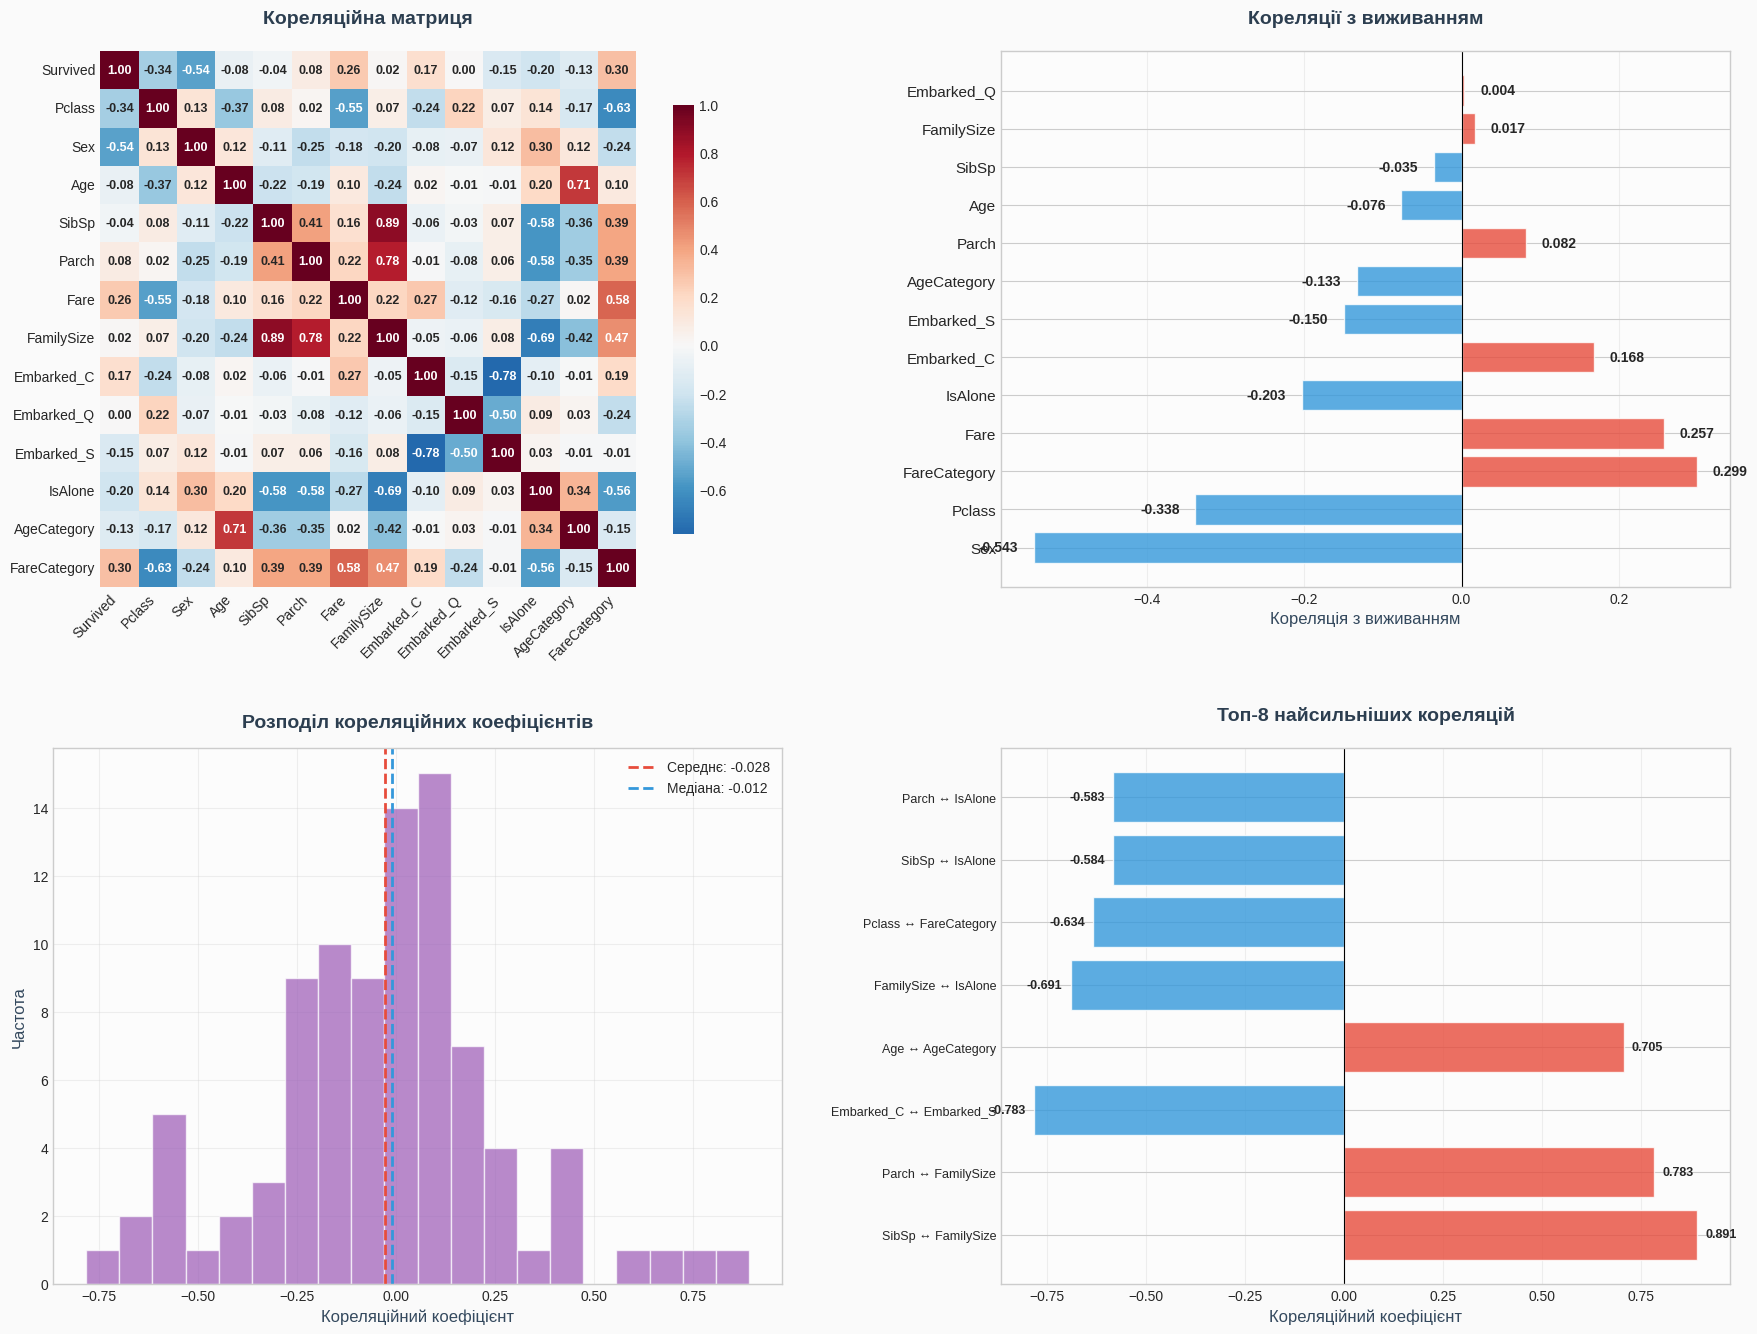


            –ö–û–†–ï–õ–Ø–¶–Ü–ô–ù–ò–ô –ê–ù–ê–õ–Ü–ó - –í–ò–°–ù–û–í–ö–ò

üìä –û–°–ù–û–í–ù–Ü –ö–û–†–ï–õ–Ø–¶–Ü–á –ó –í–ò–ñ–ò–í–ê–ù–ù–Ø–ú:
   ‚Ä¢ Sex: -0.543 (—Å–∏–ª—å–Ω–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –∫–æ—Ä–µ–ª—é—î)
   ‚Ä¢ Pclass: -0.338 (—Å–∏–ª—å–Ω–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –∫–æ—Ä–µ–ª—é—î)
   ‚Ä¢ FareCategory: 0.299 (–ø–æ–º—ñ—Ä–Ω–æ –ø–æ–∑–∏—Ç–∏–≤–Ω–æ –∫–æ—Ä–µ–ª—é—î)

üîç –ù–ê–ô–°–ò–õ–¨–ù–Ü–®–Ü –ö–û–†–ï–õ–Ø–¶–Ü–á –í –î–ê–¢–ê–°–ï–¢–Ü:
   ‚Ä¢ SibSp - FamilySize: 0.891 (–ø–æ–∑–∏—Ç–∏–≤–Ω–∞)
   ‚Ä¢ Parch - FamilySize: 0.783 (–ø–æ–∑–∏—Ç–∏–≤–Ω–∞)
   ‚Ä¢ Embarked_C - Embarked_S: -0.783 (–Ω–µ–≥–∞—Ç–∏–≤–Ω–∞)

üìà –°–¢–ê–¢–ò–°–¢–ò–ö–ê –ö–û–†–ï–õ–Ø–¶–Ü–ô:
   ‚Ä¢ –°–µ—Ä–µ–¥–Ω—î –∑–Ω–∞—á–µ–Ω–Ω—è: -0.028
   ‚Ä¢ –ú–µ–¥—ñ–∞–Ω–∞: -0.012
   ‚Ä¢ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–µ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è: 0.306
   ‚Ä¢ –ö–æ—Ä–µ–ª—è—Ü—ñ–π > 0.5: 12
   ‚Ä¢ –ö–æ—Ä–µ–ª—è—Ü—ñ–π > 0.3: 24



In [14]:
# –ö–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∏–π –∞–Ω–∞–ª—ñ–∑ Titanic –¥–∞—Ç–∞—Å–µ—Ç—É
plt.style.use('seaborn-v0_8-whitegrid')
df = df_final
# –ö–æ–ª—å–æ—Ä–æ–≤–∞ —Å—Ö–µ–º–∞ –¥–ª—è –∫–æ—Ä–µ–ª—è—Ü—ñ—ó
CORR_COLORS = {
    'bg_main': '#FAFAFA',
    'bg_plot': '#FCFCFC',
    'text_main': '#2C3E50',
    'text_secondary': '#34495E',
    'positive': '#E74C3C',
    'negative': '#3498DB',
    'neutral': '#95A5A6'
}

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è —Ñ—ñ–≥—É—Ä–∏ –¥–ª—è –∫–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–æ–≥–æ –∞–Ω–∞–ª—ñ–∑—É
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.patch.set_facecolor(CORR_COLORS['bg_main'])
# fig.suptitle('–ö–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∏–π –∞–Ω–∞–ª—ñ–∑ –¥–∞—Ç–∞—Å–µ—Ç—É Titanic',
#              fontsize=18, fontweight='600', color=CORR_COLORS['text_main'], y=0.95)

# –ü—ñ–¥–≥–æ—Ç–æ–≤–∫–∞ —á–∏—Å–ª–æ–≤–∏—Ö –¥–∞–Ω–∏—Ö
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# 1. –û—Å–Ω–æ–≤–Ω–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∞ –º–∞—Ç—Ä–∏—Ü—è (–ø–æ–≤–Ω–∞)
axes[0,0].set_facecolor(CORR_COLORS['bg_plot'])

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            ax=axes[0,0],
            fmt='.2f',
            cbar_kws={"shrink": 0.8},
            annot_kws={'size': 9, 'weight': 'bold'})

axes[0,0].set_title('–ö–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∞ –º–∞—Ç—Ä–∏—Ü—è',
                    fontsize=14, fontweight='600', color=CORR_COLORS['text_main'], pad=20)
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,0].set_yticklabels(axes[0,0].get_yticklabels(), rotation=0)

# 2. –ö–æ—Ä–µ–ª—è—Ü—ñ—ó –∑ –≤–∏–∂–∏–≤–∞–Ω–Ω—è–º (–æ–∫—Ä–µ–º–æ)
axes[0,1].set_facecolor(CORR_COLORS['bg_plot'])
survival_corrs = correlation_matrix['Survived'].drop('Survived').sort_values(key=abs, ascending=False)

colors = [CORR_COLORS['positive'] if x > 0 else CORR_COLORS['negative'] for x in survival_corrs.values]
bars = axes[0,1].barh(range(len(survival_corrs)), survival_corrs.values,
                      color=colors, alpha=0.8, edgecolor='white')

# –î–æ–¥–∞–≤–∞–Ω–Ω—è –∑–Ω–∞—á–µ–Ω—å –Ω–∞ –±–∞—Ä–∏
for i, (bar, value) in enumerate(zip(bars, survival_corrs.values)):
    axes[0,1].text(value + (0.02 if value > 0 else -0.02), i,
                   f'{value:.3f}',
                   ha='left' if value > 0 else 'right',
                   va='center',
                   fontweight='bold',
                   fontsize=10)

axes[0,1].set_yticks(range(len(survival_corrs)))
axes[0,1].set_yticklabels(survival_corrs.index, fontsize=11)
axes[0,1].set_xlabel('–ö–æ—Ä–µ–ª—è—Ü—ñ—è –∑ –≤–∏–∂–∏–≤–∞–Ω–Ω—è–º', fontsize=12, color=CORR_COLORS['text_secondary'])
axes[0,1].set_title('–ö–æ—Ä–µ–ª—è—Ü—ñ—ó –∑ –≤–∏–∂–∏–≤–∞–Ω–Ω—è–º', fontsize=14, fontweight='600',
                    color=CORR_COLORS['text_main'], pad=20)
axes[0,1].grid(True, alpha=0.3, axis='x')
axes[0,1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# 3. –†–æ–∑–ø–æ–¥—ñ–ª –∫–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∏—Ö –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç—ñ–≤
axes[1,0].set_facecolor(CORR_COLORS['bg_plot'])
# –ë–µ—Ä–µ–º–æ –≤—Å—ñ –∫–æ—Ä–µ–ª—è—Ü—ñ—ó –æ–∫—Ä—ñ–º –¥—ñ–∞–≥–æ–Ω–∞–ª—å–Ω–∏—Ö
corr_values = correlation_matrix.values
corr_flat = corr_values[np.triu_indices_from(corr_values, k=1)]

axes[1,0].hist(corr_flat, bins=20, alpha=0.7, color='#9B59B6', edgecolor='white')
axes[1,0].axvline(np.mean(corr_flat), color=CORR_COLORS['positive'],
                  linestyle='--', linewidth=2, label=f'–°–µ—Ä–µ–¥–Ω—î: {np.mean(corr_flat):.3f}')
axes[1,0].axvline(np.median(corr_flat), color=CORR_COLORS['negative'],
                  linestyle='--', linewidth=2, label=f'–ú–µ–¥—ñ–∞–Ω–∞: {np.median(corr_flat):.3f}')

axes[1,0].set_xlabel('–ö–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∏–π –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç', fontsize=12, color=CORR_COLORS['text_secondary'])
axes[1,0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞', fontsize=12, color=CORR_COLORS['text_secondary'])
axes[1,0].set_title('–†–æ–∑–ø–æ–¥—ñ–ª –∫–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∏—Ö –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç—ñ–≤',
                    fontsize=14, fontweight='600', color=CORR_COLORS['text_main'], pad=15)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. –¢–æ–ø-5 –Ω–∞–π—Å–∏–ª—å–Ω—ñ—à–∏—Ö –∫–æ—Ä–µ–ª—è—Ü—ñ–π (–∑–∞ –º–æ–¥—É–ª–µ–º)
axes[1,1].set_facecolor(CORR_COLORS['bg_plot'])

# –ó–Ω–∞—Ö–æ–¥–∏–º–æ –Ω–∞–π—Å–∏–ª—å–Ω—ñ—à—ñ –∫–æ—Ä–µ–ª—è—Ü—ñ—ó
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'pair': f'{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}',
            'correlation': correlation_matrix.iloc[i,j]
        })

# –°–æ—Ä—Ç—É—î–º–æ –∑–∞ –∞–±—Å–æ–ª—é—Ç–Ω–∏–º –∑–Ω–∞—á–µ–Ω–Ω—è–º
corr_df = pd.DataFrame(corr_pairs)
top_corrs = corr_df.reindex(corr_df['correlation'].abs().sort_values(ascending=False).index).head(8)

colors_top = [CORR_COLORS['positive'] if x > 0 else CORR_COLORS['negative']
              for x in top_corrs['correlation'].values]

bars = axes[1,1].barh(range(len(top_corrs)), top_corrs['correlation'].values,
                      color=colors_top, alpha=0.8, edgecolor='white')

# –î–æ–¥–∞–≤–∞–Ω–Ω—è –∑–Ω–∞—á–µ–Ω—å
for i, (bar, value) in enumerate(zip(bars, top_corrs['correlation'].values)):
    axes[1,1].text(value + (0.02 if value > 0 else -0.02), i,
                   f'{value:.3f}',
                   ha='left' if value > 0 else 'right',
                   va='center',
                   fontweight='bold',
                   fontsize=9)

axes[1,1].set_yticks(range(len(top_corrs)))
axes[1,1].set_yticklabels([pair.replace(' - ', ' ‚Üî ') for pair in top_corrs['pair']],
                          fontsize=9)
axes[1,1].set_xlabel('–ö–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∏–π –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç', fontsize=12, color=CORR_COLORS['text_secondary'])
axes[1,1].set_title('–¢–æ–ø-8 –Ω–∞–π—Å–∏–ª—å–Ω—ñ—à–∏—Ö –∫–æ—Ä–µ–ª—è—Ü—ñ–π',
                    fontsize=14, fontweight='600', color=CORR_COLORS['text_main'], pad=20)
axes[1,1].grid(True, alpha=0.3, axis='x')
axes[1,1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# –§—ñ–Ω–∞–ª—å–Ω—ñ –Ω–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.3, wspace=0.3)
plt.show()

# –¢–µ–∫—Å—Ç–æ–≤–∏–π –∞–Ω–∞–ª—ñ–∑ –∫–æ—Ä–µ–ª—è—Ü—ñ–π
print("\n" + "="*60)
print("            –ö–û–†–ï–õ–Ø–¶–Ü–ô–ù–ò–ô –ê–ù–ê–õ–Ü–ó - –í–ò–°–ù–û–í–ö–ò")
print("="*60)

print(f"\nüìä –û–°–ù–û–í–ù–Ü –ö–û–†–ï–õ–Ø–¶–Ü–á –ó –í–ò–ñ–ò–í–ê–ù–ù–Ø–ú:")
for feature, corr in survival_corrs.head(3).items():
    direction = "–ø–æ–∑–∏—Ç–∏–≤–Ω–æ" if corr > 0 else "–Ω–µ–≥–∞—Ç–∏–≤–Ω–æ"
    strength = "—Å–∏–ª—å–Ω–æ" if abs(corr) > 0.3 else "–ø–æ–º—ñ—Ä–Ω–æ" if abs(corr) > 0.1 else "—Å–ª–∞–±–æ"
    print(f"   ‚Ä¢ {feature}: {corr:.3f} ({strength} {direction} –∫–æ—Ä–µ–ª—é—î)")

print(f"\nüîç –ù–ê–ô–°–ò–õ–¨–ù–Ü–®–Ü –ö–û–†–ï–õ–Ø–¶–Ü–á –í –î–ê–¢–ê–°–ï–¢–Ü:")
for _, row in top_corrs.head(3).iterrows():
    direction = "–ø–æ–∑–∏—Ç–∏–≤–Ω–∞" if row['correlation'] > 0 else "–Ω–µ–≥–∞—Ç–∏–≤–Ω–∞"
    print(f"   ‚Ä¢ {row['pair']}: {row['correlation']:.3f} ({direction})")

print(f"\nüìà –°–¢–ê–¢–ò–°–¢–ò–ö–ê –ö–û–†–ï–õ–Ø–¶–Ü–ô:")
print(f"   ‚Ä¢ –°–µ—Ä–µ–¥–Ω—î –∑–Ω–∞—á–µ–Ω–Ω—è: {np.mean(corr_flat):.3f}")
print(f"   ‚Ä¢ –ú–µ–¥—ñ–∞–Ω–∞: {np.median(corr_flat):.3f}")
print(f"   ‚Ä¢ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–µ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è: {np.std(corr_flat):.3f}")
print(f"   ‚Ä¢ –ö–æ—Ä–µ–ª—è—Ü—ñ–π > 0.5: {sum(abs(x) > 0.5 for x in corr_flat)}")
print(f"   ‚Ä¢ –ö–æ—Ä–µ–ª—è—Ü—ñ–π > 0.3: {sum(abs(x) > 0.3 for x in corr_flat)}")

print("\n" + "="*60)

–£–∂–µ –º–æ–∂–Ω–∞ –ø–æ–±–∞—á–∏—Ç–∏ –∫—ñ–ª—å–∫–∞ —Ü—ñ–∫–∞–≤–∏—Ö –∑–º—ñ–Ω–Ω–∏—Ö, —è–∫—ñ –º–∞—é—Ç—å —Å–∏–ª—å–Ω—É –∫–æ—Ä–µ–ª—è—Ü—ñ—é —ñ–∑ —Ü—ñ–ª—å–æ–≤–æ—é –∑–º—ñ–Ω–Ω–æ—é, –∞–ª–µ –Ω–∞—Ä–∞–∑—ñ –º–∏ –Ω–µ –ø—Ä–æ–≤–æ–¥–∏–ª–∏ –Ω—ñ—è–∫–∏—Ö —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü—ñ–π –Ω–∞–¥ –¥–∞—Ç–∞—Å–µ—Ç–æ–º, —ñ —É –∫–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–æ–º—É –∞–Ω–∞–ª—ñ–∑—ñ —É–ø—É—â–µ–Ω–Ω–æ –∑–º—ñ–Ω—É "—Å—Ç–∞—Ç—å", —è–∫–∞ –ø–æ—Ç–µ–Ω—Ü—ñ–π–Ω–æ —Ç–∞–∫–æ–∂ —Å–∏–ª—å–Ω—É –∫–æ—Ä–µ–ª—è—Ü—ñ—é —ñ–∑ —Ü—ñ–ª—å–æ–≤–æ—é, —Ç–æ–ø—É –ø—Ä–∏—Å—Ç—É–ø–∏–º–æ –¥–æ –Ω–µ—ó.

In [9]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  
0      0         A/5 21171   7.2500   NaN        S           2  
1      0          PC 17599  71.2833   C85        C           2  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S           2  
4      0            373450   8.0500   NaN        S           1

=== –ü–û–ö–†–û–ö–û–í–ê –¢–†–ê–ù–°–§–û–†–ú–ê–¶–Ü–Ø –î–ê–¢–ê–°–ï–¢–£ TITANIC ===
–ü–æ—á–∞—Ç–∫–æ–≤–∏–π —Ä–æ–∑–º—ñ—Ä: (891, 13)
–ö–æ–ª–æ–Ω–∫–∏: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize']

–ö–†–û–ö 1: –û–ß–ò–©–ï–ù–ù–Ø –¢–ê –ó–ê–ü–û–í–ù–ï–ù–ù–Ø –ü–†–û–ü–£–©–ï–ù–ò–• –ó–ù–ê–ß–ï–ù–¨

--- –ê–Ω–∞–ª—ñ–∑ –ø—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å ---
  ‚Ä¢ Age: 177 (19.9%)
  ‚Ä¢ Cabin: 687 (77.1%)
  ‚Ä¢ Embarked: 2 (0.2%)

--- –í–∏–¥–∞–ª–µ–Ω–Ω—è –Ω–µ–ø–æ—Ç—Ä—ñ–±–Ω–∏—Ö –∫–æ–ª–æ–Ω–æ–∫ ---
–í–∏–¥–∞–ª–µ–Ω—ñ –∫–æ–ª–æ–Ω–∫–∏: ['PassengerId', 'Name', 'Ticket', 'Cabin']
–ó–∞–ª–∏—à–∏–ª–æ—Å—å –∫–æ–ª–æ–Ω–æ–∫: 9

--- –ó–∞–ø–æ–≤–Ω–µ–Ω–Ω—è –≤—ñ–∫—É (Age) ---
–ü—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å Age: 177
KNN Imputation –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–≤ 5 –æ–∑–Ω–∞–∫ –¥–ª—è –∑–∞–ø–æ–≤–Ω–µ–Ω–Ω—è
–í—Å—å–æ–≥–æ –∑–∞–ø–æ–≤–Ω–µ–Ω–æ Age: 177 –∑–Ω–∞—á–µ–Ω—å

--- –ó–∞–ø–æ–≤–Ω–µ–Ω–Ω—è –ø–æ—Ä—Ç—É –ø–æ—Å–∞–¥–∫–∏ (Embarked) ---
–ó–∞–ø–æ–≤–Ω–µ–Ω–æ 2 –∑–Ω–∞—á–µ–Ω—å

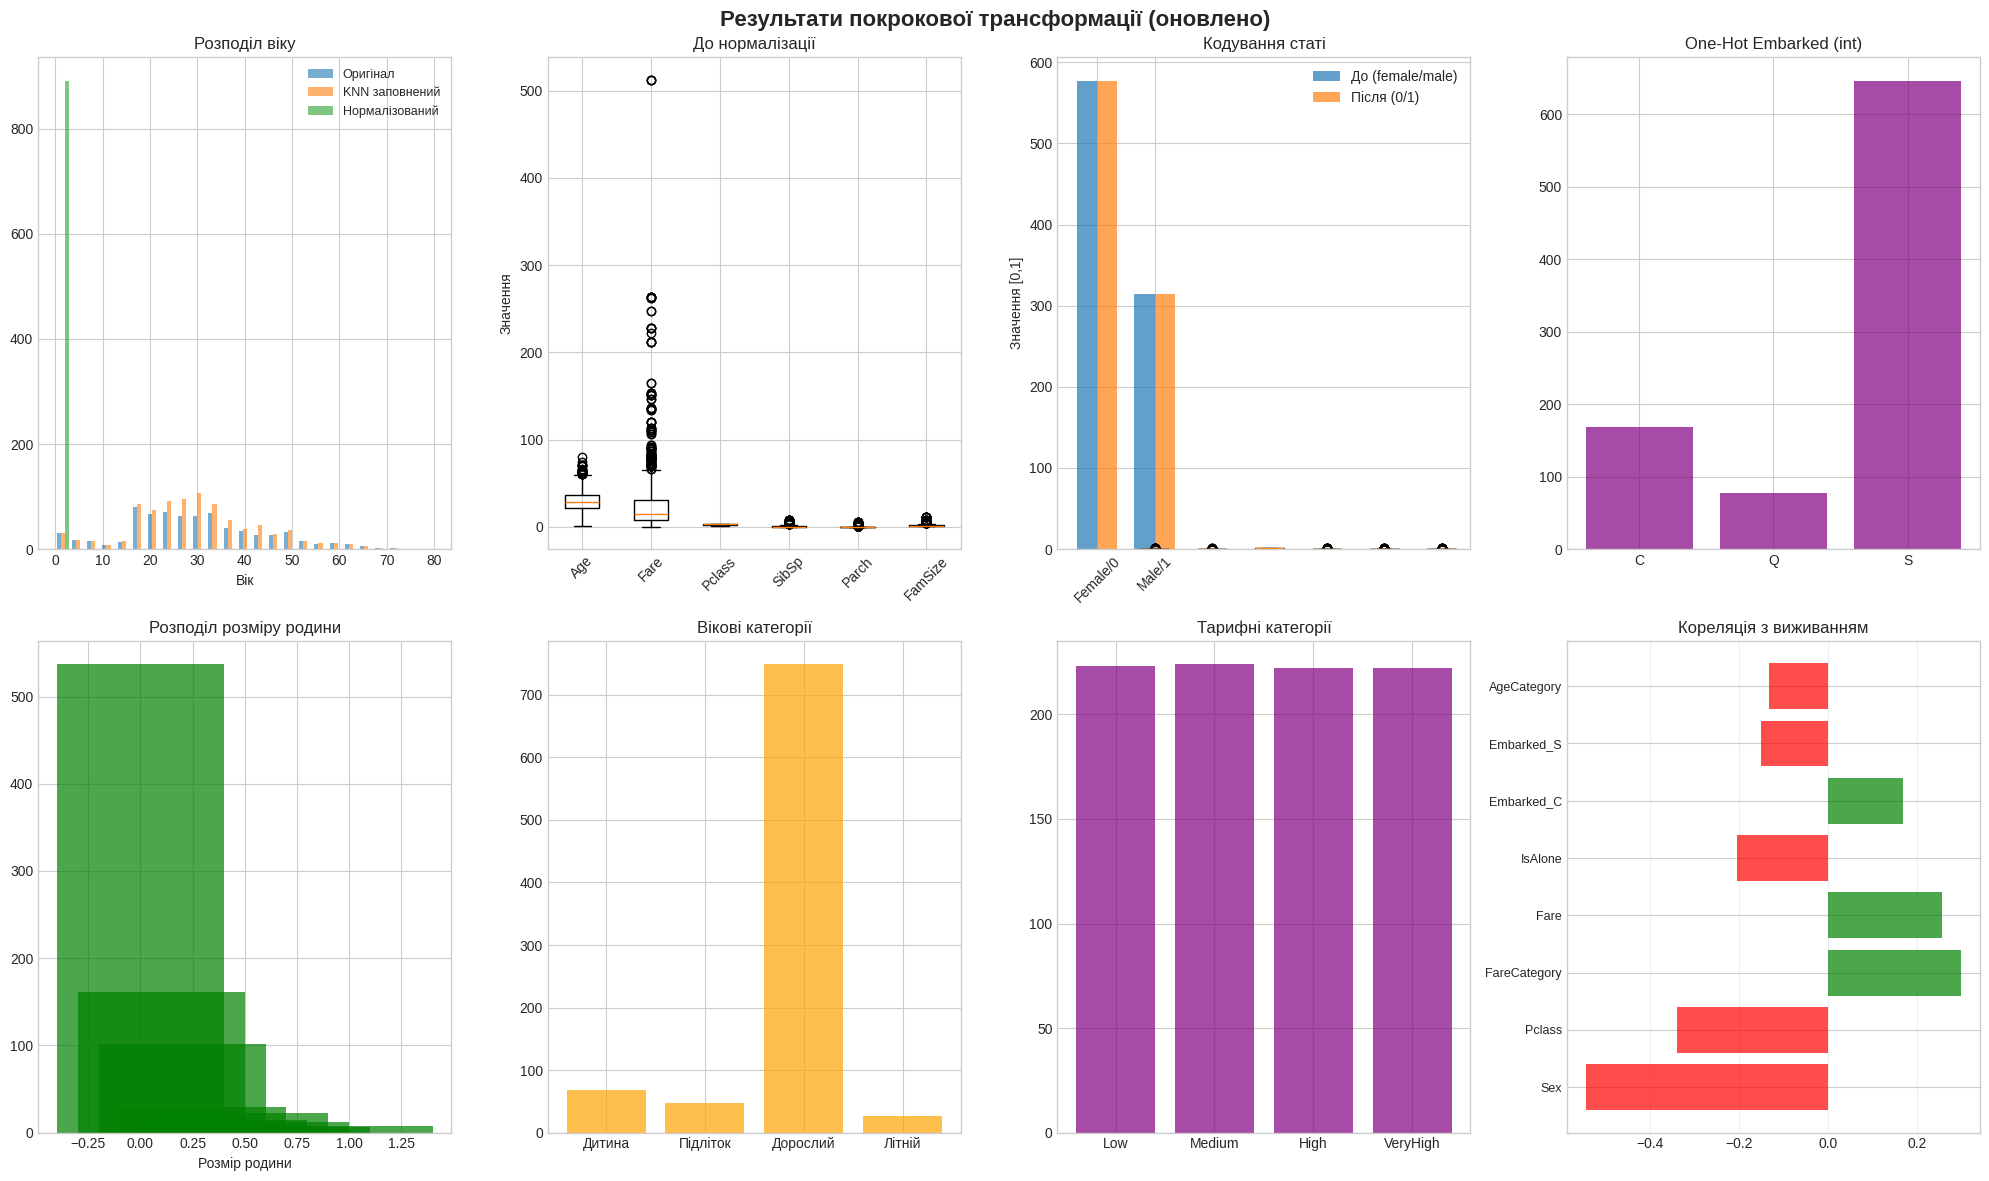


                      –§–Ü–ù–ê–õ–¨–ù–ò–ô –ó–í–Ü–¢

üìä –¢–†–ê–ù–°–§–û–†–ú–ê–¶–Ü–Ø –ó–ê–í–ï–†–®–ï–ù–ê:
   ‚Ä¢ –ü–æ—á–∞—Ç–∫–æ–≤–∏–π —Ä–æ–∑–º—ñ—Ä: (891, 13)
   ‚Ä¢ –§—ñ–Ω–∞–ª—å–Ω–∏–π —Ä–æ–∑–º—ñ—Ä: (891, 14)
   ‚Ä¢ –ü—Ä–æ–ø—É—â–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è: 866 ‚Üí 0

üîß –í–ò–ö–û–ù–ê–ù–Ü –ö–†–û–ö–ò:
   –ö–†–û–ö 1 - –û—á–∏—â–µ–Ω–Ω—è:
     ‚Ä¢ –í–∏–¥–∞–ª–µ–Ω–æ 4 –∫–æ–ª–æ–Ω–∫–∏: PassengerId, Name, Ticket, Cabin
     ‚Ä¢ –ó–∞–ø–æ–≤–Ω–µ–Ω–æ 177 –∑–Ω–∞—á–µ–Ω—å Age —á–µ—Ä–µ–∑ KNN Imputation
     ‚Ä¢ –ó–∞–ø–æ–≤–Ω–µ–Ω–æ Embarked
   –ö–†–û–ö 2 - –ö–æ–¥—É–≤–∞–Ω–Ω—è:
     ‚Ä¢ Sex: Label Encoding (female=0, male=1)
     ‚Ä¢ Embarked: One-Hot Encoding –∑ int (0/1)
   –ö–†–û–ö 3 - –ù–æ–≤—ñ –æ–∑–Ω–∞–∫–∏:
     ‚Ä¢ FamilySize, IsAlone, AgeCategory, FareCategory
   –ö–†–û–ö 4 - –ù–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—è:
     ‚Ä¢ 6 —á–∏—Å–ª–æ–≤–∏—Ö –æ–∑–Ω–∞–∫ –Ω–æ—Ä–º–∞–ª—ñ–∑–æ–≤–∞–Ω—ñ –¥–æ [0, 1]
     ‚Ä¢ –ë—ñ–Ω–∞—Ä–Ω—ñ —Ç–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω—ñ –æ–∑–Ω–∞–∫–∏ –∑–∞–ª–∏—à–µ–Ω—ñ –±–µ–∑ –∑–º—ñ–Ω

üéØ –ì–û–¢–û–í–ò–ô –î–ê–¢–ê–

In [10]:
# –ü–æ–∫—Ä–æ–∫–æ–≤–∞ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü—ñ—è –¥–∞—Ç–∞—Å–µ—Ç—É Titanic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("=== –ü–û–ö–†–û–ö–û–í–ê –¢–†–ê–ù–°–§–û–†–ú–ê–¶–Ü–Ø –î–ê–¢–ê–°–ï–¢–£ TITANIC ===")
print(f"–ü–æ—á–∞—Ç–∫–æ–≤–∏–π —Ä–æ–∑–º—ñ—Ä: {df.shape}")
print(f"–ö–æ–ª–æ–Ω–∫–∏: {list(df.columns)}")

# ===== –ö–†–û–ö 1: –û–ß–ò–©–ï–ù–ù–Ø –¢–ê –ó–ê–ü–û–í–ù–ï–ù–ù–Ø –ü–†–û–ü–£–©–ï–ù–ò–• –ó–ù–ê–ß–ï–ù–¨ =====
print("\n" + "="*60)
print("–ö–†–û–ö 1: –û–ß–ò–©–ï–ù–ù–Ø –¢–ê –ó–ê–ü–û–í–ù–ï–ù–ù–Ø –ü–†–û–ü–£–©–ï–ù–ò–• –ó–ù–ê–ß–ï–ù–¨")
print("="*60)

# –°—Ç–≤–æ—Ä—é—î–º–æ –∫–æ–ø—ñ—é
df_step1 = df.copy()

print("\n--- –ê–Ω–∞–ª—ñ–∑ –ø—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å ---")
missing_info = []
for col in df_step1.columns:
    missing_count = df_step1[col].isnull().sum()
    if missing_count > 0:
        missing_pct = (missing_count / len(df_step1)) * 100
        missing_info.append(f"{col}: {missing_count} ({missing_pct:.1f}%)")

if missing_info:
    for info in missing_info:
        print(f"  ‚Ä¢ {info}")
else:
    print("  ‚Ä¢ –ü—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å –Ω–µ –∑–Ω–∞–π–¥–µ–Ω–æ")

# 1.1 –í–∏–¥–∞–ª–µ–Ω–Ω—è –Ω–µ–ø–æ—Ç—Ä—ñ–±–Ω–∏—Ö –∫–æ–ª–æ–Ω–æ–∫
print("\n--- –í–∏–¥–∞–ª–µ–Ω–Ω—è –Ω–µ–ø–æ—Ç—Ä—ñ–±–Ω–∏—Ö –∫–æ–ª–æ–Ω–æ–∫ ---")
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_step1 = df_step1.drop(columns=columns_to_drop)
print(f"–í–∏–¥–∞–ª–µ–Ω—ñ –∫–æ–ª–æ–Ω–∫–∏: {columns_to_drop}")
print(f"–ó–∞–ª–∏—à–∏–ª–æ—Å—å –∫–æ–ª–æ–Ω–æ–∫: {df_step1.shape[1]}")

# 1.2 –ó–∞–ø–æ–≤–Ω–µ–Ω–Ω—è Age
print("\n--- –ó–∞–ø–æ–≤–Ω–µ–Ω–Ω—è –≤—ñ–∫—É (Age) ---")
age_missing_before = df_step1['Age'].isnull().sum()
print(f"–ü—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å Age: {age_missing_before}")

# –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ KNN Imputation –¥–ª—è –±—ñ–ª—å—à –ø—Ä–∏—Ä–æ–¥–Ω–æ–≥–æ —Ä–æ–∑–ø–æ–¥—ñ–ª—É
from sklearn.impute import KNNImputer

# –ü—ñ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–∏—Ö –¥–ª—è KNN (–≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ —á–∏—Å–ª–æ–≤—ñ –æ–∑–Ω–∞–∫–∏)
features_for_imputation = ['Pclass', 'SibSp', 'Parch', 'Fare']
# –¢–∏–º—á–∞—Å–æ–≤–æ –∫–æ–¥—É—î–º–æ —Å—Ç–∞—Ç—å –¥–ª—è KNN
sex_temp = LabelEncoder().fit_transform(df_step1['Sex'])

# –°—Ç–≤–æ—Ä—é—î–º–æ —Ç–∏–º—á–∞—Å–æ–≤–∏–π –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è —ñ–º–ø—É—Ç–∞—Ü—ñ—ó
temp_data = df_step1[features_for_imputation + ['Age']].copy()
temp_data['Sex_temp'] = sex_temp

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
temp_data_filled = knn_imputer.fit_transform(temp_data)

# –ü–æ–≤–µ—Ä—Ç–∞—î–º–æ –∑–∞–ø–æ–≤–Ω–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –Ω–∞–∑–∞–¥
df_step1['Age'] = temp_data_filled[:, -2]  # Age –∫–æ–ª–æ–Ω–∫–∞
age_filled = age_missing_before

print(f"KNN Imputation –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–≤ {len(features_for_imputation)+1} –æ–∑–Ω–∞–∫ –¥–ª—è –∑–∞–ø–æ–≤–Ω–µ–Ω–Ω—è")
print(f"–í—Å—å–æ–≥–æ –∑–∞–ø–æ–≤–Ω–µ–Ω–æ Age: {age_filled} –∑–Ω–∞—á–µ–Ω—å")

# 1.3 –ó–∞–ø–æ–≤–Ω–µ–Ω–Ω—è Embarked
print("\n--- –ó–∞–ø–æ–≤–Ω–µ–Ω–Ω—è –ø–æ—Ä—Ç—É –ø–æ—Å–∞–¥–∫–∏ (Embarked) ---")
embarked_missing = df_step1['Embarked'].isnull().sum()
if embarked_missing > 0:
    embarked_mode = df_step1['Embarked'].mode()[0]
    df_step1['Embarked'].fillna(embarked_mode, inplace=True)
    print(f"–ó–∞–ø–æ–≤–Ω–µ–Ω–æ {embarked_missing} –∑–Ω–∞—á–µ–Ω—å –º–æ–¥–æ—é: {embarked_mode}")
else:
    print("–ü—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å –Ω–µ–º–∞—î")

# –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É
print("\n--- –†–µ–∑—É–ª—å—Ç–∞—Ç –∫—Ä–æ–∫—É 1 ---")
remaining_missing = df_step1.isnull().sum().sum()
print(f"–†–æ–∑–º—ñ—Ä –ø—ñ—Å–ª—è –æ—á–∏—â–µ–Ω–Ω—è: {df_step1.shape}")
print(f"–ü—Ä–æ–ø—É—â–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø—ñ—Å–ª—è –æ–±—Ä–æ–±–∫–∏: {remaining_missing}")
print(f"–ö–æ–ª–æ–Ω–∫–∏: {list(df_step1.columns)}")

# ===== –ö–†–û–ö 2: –ö–û–î–£–í–ê–ù–ù–Ø –ö–ê–¢–ï–ì–û–†–Ü–ê–õ–¨–ù–ò–• –ó–ú–Ü–ù–ù–ò–• =====
print("\n" + "="*60)
print("–ö–†–û–ö 2: –ö–û–î–£–í–ê–ù–ù–Ø –ö–ê–¢–ï–ì–û–†–Ü–ê–õ–¨–ù–ò–• –ó–ú–Ü–ù–ù–ò–•")
print("="*60)

df_step2 = df_step1.copy()

print("\n--- –ê–Ω–∞–ª—ñ–∑ –∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∏—Ö –∑–º—ñ–Ω–Ω–∏—Ö ---")
categorical_cols = df_step2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_values = df_step2[col].unique()
    print(f"  ‚Ä¢ {col}: {unique_values} ({len(unique_values)} –∑–Ω–∞—á–µ–Ω—å)")

# 2.1 –ö–æ–¥—É–≤–∞–Ω–Ω—è Sex (–±—ñ–Ω–∞—Ä–Ω–∞ –∑–º—ñ–Ω–Ω–∞)
print("\n--- –ö–æ–¥—É–≤–∞–Ω–Ω—è —Å—Ç–∞—Ç—ñ (Sex) ---")
print("–°—Ç—Ä–∞—Ç–µ–≥—ñ—è: Label Encoding")
le_sex = LabelEncoder()
df_step2['Sex'] = le_sex.fit_transform(df_step2['Sex'])
sex_mapping = dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))
print(f"–ú–∞–ø–ø—ñ–Ω–≥: {sex_mapping}")

# 2.2 –ö–æ–¥—É–≤–∞–Ω–Ω—è Embarked (–Ω–æ–º—ñ–Ω–∞–ª—å–Ω–∞ –∑–º—ñ–Ω–Ω–∞)
print("\n--- –ö–æ–¥—É–≤–∞–Ω–Ω—è –ø–æ—Ä—Ç—É (Embarked) ---")
print("–°—Ç—Ä–∞—Ç–µ–≥—ñ—è: One-Hot Encoding –∑ —è–≤–Ω–∏–º –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—è–º –¥–æ int")
embarked_dummies = pd.get_dummies(df_step2['Embarked'], prefix='Embarked').astype(int)
df_step2 = df_step2.drop('Embarked', axis=1)
df_step2 = pd.concat([df_step2, embarked_dummies], axis=1)
print(f"–°—Ç–≤–æ—Ä–µ–Ω—ñ –∫–æ–ª–æ–Ω–∫–∏: {list(embarked_dummies.columns)}")
print("One-hot –∑–º—ñ–Ω–Ω—ñ –ø—Ä–∏–≤–µ–¥–µ–Ω—ñ –¥–æ int (0/1) –∑–∞–º—ñ—Å—Ç—å bool (True/False)")

# 2.3 Pclass –∑–∞–ª–∏—à–∞—î–º–æ —è–∫ —î (–ø–æ—Ä—è–¥–∫–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞)
print("\n--- –ö–ª–∞—Å (Pclass) ---")
print("–ó–∞–ª–∏—à–µ–Ω–æ —è–∫ —á–∏—Å–ª–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞ (1, 2, 3) - –º–∞—î –ª–æ–≥—ñ—á–Ω–∏–π –ø–æ—Ä—è–¥–æ–∫")

print("\n--- –†–µ–∑—É–ª—å—Ç–∞—Ç –∫—Ä–æ–∫—É 2 ---")
print(f"–†–æ–∑–º—ñ—Ä: {df_step2.shape}")
print(f"–ö–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∏—Ö –∫–æ–ª–æ–Ω–æ–∫ –∑–∞–ª–∏—à–∏–ª–æ—Å—å: {len(df_step2.select_dtypes(include=['object']).columns)}")
print(f"–í—Å—ñ –∫–æ–ª–æ–Ω–∫–∏: {list(df_step2.columns)}")

# ===== –ö–†–û–ö 3: –°–¢–í–û–†–ï–ù–ù–Ø –ù–û–í–ò–• –û–ó–ù–ê–ö (FEATURE ENGINEERING) =====
print("\n" + "="*60)
print("–ö–†–û–ö 3: –°–¢–í–û–†–ï–ù–ù–Ø –ù–û–í–ò–• –û–ó–ù–ê–ö")
print("="*60)

df_step3 = df_step2.copy()

# 3.1 –†–æ–∑–º—ñ—Ä —Ä–æ–¥–∏–Ω–∏
print("\n--- –°—Ç–≤–æ—Ä–µ–Ω–Ω—è FamilySize ---")
df_step3['FamilySize'] = df_step3['SibSp'] + df_step3['Parch'] + 1
family_stats = df_step3['FamilySize'].value_counts().sort_index()
print("FamilySize = SibSp + Parch + 1")
print(f"–†–æ–∑–ø–æ–¥—ñ–ª: {dict(family_stats.head())}")

# 3.2 –ü–æ–¥–æ—Ä–æ–∂—É—î —Å–∞–º
print("\n--- –°—Ç–≤–æ—Ä–µ–Ω–Ω—è IsAlone ---")
df_step3['IsAlone'] = (df_step3['FamilySize'] == 1).astype(int)
alone_count = df_step3['IsAlone'].sum()
total_count = len(df_step3)
print(f"IsAlone: {alone_count} –∑ {total_count} ({alone_count/total_count*100:.1f}%) –ø–æ–¥–æ—Ä–æ–∂—É—é—Ç—å —Å–∞–º–æ—Å—Ç—ñ–π–Ω–æ")

# 3.3 –í—ñ–∫–æ–≤—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
print("\n--- –°—Ç–≤–æ—Ä–µ–Ω–Ω—è AgeCategory ---")
def categorize_age(age):
    if age < 12:
        return 0  # –î–∏—Ç–∏–Ω–∞
    elif age < 18:
        return 1  # –ü—ñ–¥–ª—ñ—Ç–æ–∫
    elif age < 60:
        return 2  # –î–æ—Ä–æ—Å–ª–∏–π
    else:
        return 3  # –õ—ñ—Ç–Ω—ñ–π

df_step3['AgeCategory'] = df_step3['Age'].apply(categorize_age)
age_cat_names = ['–î–∏—Ç–∏–Ω–∞ (<12)', '–ü—ñ–¥–ª—ñ—Ç–æ–∫ (12-17)', '–î–æ—Ä–æ—Å–ª–∏–π (18-59)', '–õ—ñ—Ç–Ω—ñ–π (60+)']
age_distribution = df_step3['AgeCategory'].value_counts().sort_index()
for i, count in age_distribution.items():
    print(f"  {i} ({age_cat_names[i]}): {count} –æ—Å—ñ–±")

# 3.4 –¢–∞—Ä–∏—Ñ–Ω—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
print("\n--- –°—Ç–≤–æ—Ä–µ–Ω–Ω—è FareCategory ---")
# –ö–≤–∞—Ä—Ç–∏–ª—ñ –¥–ª—è —Ç–∞—Ä–∏—Ñ—ñ–≤
fare_quartiles = df_step3['Fare'].quantile([0.25, 0.5, 0.75]).values
print(f"–ö–≤–∞—Ä—Ç–∏–ª—ñ —Ç–∞—Ä–∏—Ñ—ñ–≤: {fare_quartiles}")

def categorize_fare(fare):
    if fare <= fare_quartiles[0]:
        return 0  # Low
    elif fare <= fare_quartiles[1]:
        return 1  # Medium
    elif fare <= fare_quartiles[2]:
        return 2  # High
    else:
        return 3  # VeryHigh

df_step3['FareCategory'] = df_step3['Fare'].apply(categorize_fare)
fare_cat_names = ['Low', 'Medium', 'High', 'VeryHigh']
fare_distribution = df_step3['FareCategory'].value_counts().sort_index()
for i, count in fare_distribution.items():
    print(f"  {i} ({fare_cat_names[i]}): {count} –æ—Å—ñ–±")

print("\n--- –†–µ–∑—É–ª—å—Ç–∞—Ç –∫—Ä–æ–∫—É 3 ---")
print(f"–§—ñ–Ω–∞–ª—å–Ω–∏–π —Ä–æ–∑–º—ñ—Ä: {df_step3.shape}")
print(f"–ù–æ–≤—ñ –æ–∑–Ω–∞–∫–∏: FamilySize, IsAlone, AgeCategory, FareCategory")
print(f"–í—Å—ñ –∫–æ–ª–æ–Ω–∫–∏: {list(df_step3.columns)}")

# ===== –ö–†–û–ö 4: –ù–û–†–ú–ê–õ–Ü–ó–ê–¶–Ü–Ø –ß–ò–°–õ–û–í–ò–• –û–ó–ù–ê–ö =====
print("\n" + "="*60)
print("–ö–†–û–ö 4: –ù–û–†–ú–ê–õ–Ü–ó–ê–¶–Ü–Ø –ß–ò–°–õ–û–í–ò–• –û–ó–ù–ê–ö")
print("="*60)

df_step4 = df_step3.copy()

# 4.1 –Ü–¥–µ–Ω—Ç–∏—Ñ—ñ–∫–∞—Ü—ñ—è —á–∏—Å–ª–æ–≤–∏—Ö –æ–∑–Ω–∞–∫ –¥–ª—è –Ω–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—ó
print("\n--- –ê–Ω–∞–ª—ñ–∑ —á–∏—Å–ª–æ–≤–∏—Ö –æ–∑–Ω–∞–∫ ---")
# –ù–æ—Ä–º–∞–ª—ñ–∑—É—î–º–æ –≤—Å—ñ —á–∏—Å–ª–æ–≤—ñ –∑–º—ñ–Ω–Ω—ñ –æ–∫—Ä—ñ–º –±—ñ–Ω–∞—Ä–Ω–∏—Ö —Ç–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∏—Ö
numeric_cols_to_scale = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'FamilySize']
binary_cols = ['Survived', 'Sex', 'IsAlone'] + [col for col in df_step4.columns if col.startswith('Embarked_')]
categorical_cols = ['AgeCategory', 'FareCategory']

print(f"–û–∑–Ω–∞–∫–∏ –¥–ª—è –Ω–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—ó: {numeric_cols_to_scale}")
print(f"–ë—ñ–Ω–∞—Ä–Ω—ñ (–∑–∞–ª–∏—à–µ–Ω—ñ 0/1): {binary_cols}")
print(f"–ö–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω—ñ (–∑–∞–ª–∏—à–µ–Ω—ñ —è–∫ —î): {categorical_cols}")

# –ü–æ–∫–∞–∑—É—î–º–æ –¥—ñ–∞–ø–∞–∑–æ–Ω–∏ –¥–æ –Ω–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—ó
print("\n–î—ñ–∞–ø–∞–∑–æ–Ω–∏ –¥–æ –Ω–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—ó:")
for col in numeric_cols_to_scale:
    min_val, max_val = df_step4[col].min(), df_step4[col].max()
    print(f"  {col}: [{min_val:.2f}, {max_val:.2f}]")

# 4.2 MinMax –Ω–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—è
print("\n--- MinMax –Ω–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—è (0-1) ---")
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_step4[numeric_cols_to_scale] = scaler.fit_transform(df_step4[numeric_cols_to_scale])

# –ü–æ–∫–∞–∑—É—î–º–æ –¥—ñ–∞–ø–∞–∑–æ–Ω–∏ –ø—ñ—Å–ª—è –Ω–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—ó
print("–î—ñ–∞–ø–∞–∑–æ–Ω–∏ –ø—ñ—Å–ª—è –Ω–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—ó:")
for col in numeric_cols_to_scale:
    min_val, max_val = df_step4[col].min(), df_step4[col].max()
    print(f"  {col}: [{min_val:.3f}, {max_val:.3f}]")

print("\n--- –†–µ–∑—É–ª—å—Ç–∞—Ç –∫—Ä–æ–∫—É 4 ---")
print(f"–ù–æ—Ä–º–∞–ª—ñ–∑–æ–≤–∞–Ω–æ –æ–∑–Ω–∞–∫: {len(numeric_cols_to_scale)}")
print("–í—Å—ñ —á–∏—Å–ª–æ–≤—ñ –æ–∑–Ω–∞–∫–∏ –≤ –¥—ñ–∞–ø–∞–∑–æ–Ω—ñ [0, 1]")
print("–ë—ñ–Ω–∞—Ä–Ω—ñ —Ç–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω—ñ –æ–∑–Ω–∞–∫–∏ –∑–∞–ª–∏—à–µ–Ω—ñ –±–µ–∑ –∑–º—ñ–Ω")

# ===== –í–Ü–ó–£–ê–õ–Ü–ó–ê–¶–Ü–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–Ü–í =====
print("\n--- –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü—ñ–π ---")

fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('–†–µ–∑—É–ª—å—Ç–∞—Ç–∏ –ø–æ–∫—Ä–æ–∫–æ–≤–æ—ó —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü—ñ—ó (–æ–Ω–æ–≤–ª–µ–Ω–æ)', fontsize=16, fontweight='bold')

# 1. –†–æ–∑–ø–æ–¥—ñ–ª –≤—ñ–∫—É (–æ—Ä–∏–≥—ñ–Ω–∞–ª vs KNN vs –Ω–æ—Ä–º–∞–ª—ñ–∑–æ–≤–∞–Ω–∏–π)
axes[0,0].hist([df['Age'].dropna(), df_step3['Age'], df_step4['Age']],
               bins=25, alpha=0.6, label=['–û—Ä–∏–≥—ñ–Ω–∞–ª', 'KNN –∑–∞–ø–æ–≤–Ω–µ–Ω–∏–π', '–ù–æ—Ä–º–∞–ª—ñ–∑–æ–≤–∞–Ω–∏–π'])
axes[0,0].set_title('–†–æ–∑–ø–æ–¥—ñ–ª –≤—ñ–∫—É')
axes[0,0].set_xlabel('–í—ñ–∫')
axes[0,0].legend(fontsize=9)

# 2. –ù–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—è —á–∏—Å–ª–æ–≤–∏—Ö –æ–∑–Ω–∞–∫ (–¥–æ/–ø—ñ—Å–ª—è)
axes[0,1].boxplot([df_step3[col] for col in numeric_cols_to_scale],
                  labels=[col.replace('Family', 'Fam') for col in numeric_cols_to_scale])
axes[0,1].set_title('–î–æ –Ω–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—ó')
axes[0,1].set_ylabel('–ó–Ω–∞—á–µ–Ω–Ω—è')
axes[0,1].tick_params(axis='x', rotation=45)

axes[0,2].boxplot([df_step4[col] for col in numeric_cols_to_scale],
                  labels=[col.replace('Family', 'Fam') for col in numeric_cols_to_scale])
axes[0,2].set_title('–ü—ñ—Å–ª—è –Ω–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—ó')
axes[0,2].set_ylabel('–ó–Ω–∞—á–µ–Ω–Ω—è [0,1]')
axes[0,2].tick_params(axis='x', rotation=45)

# 3. –ö–æ–¥—É–≤–∞–Ω–Ω—è —Å—Ç–∞—Ç—ñ
sex_before = df['Sex'].value_counts()
sex_after = df_step4['Sex'].value_counts()
x = range(2)
width = 0.35
axes[0,2].bar([i - width/2 for i in x], sex_before.values, width, label='–î–æ (female/male)', alpha=0.7)
axes[0,2].bar([i + width/2 for i in x], sex_after.values, width, label='–ü—ñ—Å–ª—è (0/1)', alpha=0.7)
axes[0,2].set_title('–ö–æ–¥—É–≤–∞–Ω–Ω—è —Å—Ç–∞—Ç—ñ')
axes[0,2].set_xticks(x)
axes[0,2].set_xticklabels(['Female/0', 'Male/1'])
axes[0,2].legend()

# 4. One-hot encoding –ø–µ—Ä–µ–≤—ñ—Ä–∫–∞
embarked_cols = [col for col in df_step4.columns if col.startswith('Embarked_')]
embarked_sum = df_step4[embarked_cols].sum()
axes[0,3].bar(embarked_sum.index, embarked_sum.values, alpha=0.7, color='purple')
axes[0,3].set_title('One-Hot Embarked (int)')
axes[0,3].set_xticklabels([col.replace('Embarked_', '') for col in embarked_cols])

# 5. –†–æ–∑–º—ñ—Ä —Ä–æ–¥–∏–Ω–∏
family_dist = df_step4['FamilySize'].value_counts().sort_index()
axes[1,0].bar(family_dist.index, family_dist.values, alpha=0.7, color='green')
axes[1,0].set_title('–†–æ–∑–ø–æ–¥—ñ–ª —Ä–æ–∑–º—ñ—Ä—É —Ä–æ–¥–∏–Ω–∏')
axes[1,0].set_xlabel('–†–æ–∑–º—ñ—Ä —Ä–æ–¥–∏–Ω–∏')

# 6. –í—ñ–∫–æ–≤—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
age_dist = df_step4['AgeCategory'].value_counts().sort_index()
axes[1,1].bar(age_dist.index, age_dist.values, alpha=0.7, color='orange')
axes[1,1].set_title('–í—ñ–∫–æ–≤—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó')
axes[1,1].set_xticks(age_dist.index)
axes[1,1].set_xticklabels([name.split(' ')[0] for name in age_cat_names])

# 7. –¢–∞—Ä–∏—Ñ–Ω—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
fare_dist = df_step4['FareCategory'].value_counts().sort_index()
axes[1,2].bar(fare_dist.index, fare_dist.values, alpha=0.7, color='purple')
axes[1,2].set_title('–¢–∞—Ä–∏—Ñ–Ω—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó')
axes[1,2].set_xticks(fare_dist.index)
axes[1,2].set_xticklabels(fare_cat_names)

# 8. –ö–æ—Ä–µ–ª—è—Ü—ñ—è –∑ –≤–∏–∂–∏–≤–∞–Ω–Ω—è–º (—Ñ—ñ–Ω–∞–ª—å–Ω–∞)
numeric_cols = df_step4.select_dtypes(include=[np.number]).columns
corr_with_survival = df_step4[numeric_cols].corr()['Survived'].drop('Survived').sort_values(key=abs, ascending=False)
top_corr = corr_with_survival.head(8)

colors = ['red' if x < 0 else 'green' for x in top_corr.values]
axes[1,3].barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.7)
axes[1,3].set_title('–ö–æ—Ä–µ–ª—è—Ü—ñ—è –∑ –≤–∏–∂–∏–≤–∞–Ω–Ω—è–º')
axes[1,3].set_yticks(range(len(top_corr)))
axes[1,3].set_yticklabels(top_corr.index, fontsize=9)
axes[1,3].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ===== –§–Ü–ù–ê–õ–¨–ù–ò–ô –ó–í–Ü–¢ =====
print("\n" + "="*70)
print("                      –§–Ü–ù–ê–õ–¨–ù–ò–ô –ó–í–Ü–¢")
print("="*70)

print(f"\nüìä –¢–†–ê–ù–°–§–û–†–ú–ê–¶–Ü–Ø –ó–ê–í–ï–†–®–ï–ù–ê:")
print(f"   ‚Ä¢ –ü–æ—á–∞—Ç–∫–æ–≤–∏–π —Ä–æ–∑–º—ñ—Ä: {df.shape}")
print(f"   ‚Ä¢ –§—ñ–Ω–∞–ª—å–Ω–∏–π —Ä–æ–∑–º—ñ—Ä: {df_step4.shape}")
print(f"   ‚Ä¢ –ü—Ä–æ–ø—É—â–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è: {df.isnull().sum().sum()} ‚Üí {df_step4.isnull().sum().sum()}")

print(f"\nüîß –í–ò–ö–û–ù–ê–ù–Ü –ö–†–û–ö–ò:")
print(f"   –ö–†–û–ö 1 - –û—á–∏—â–µ–Ω–Ω—è:")
print(f"     ‚Ä¢ –í–∏–¥–∞–ª–µ–Ω–æ 4 –∫–æ–ª–æ–Ω–∫–∏: PassengerId, Name, Ticket, Cabin")
print(f"     ‚Ä¢ –ó–∞–ø–æ–≤–Ω–µ–Ω–æ {age_filled} –∑–Ω–∞—á–µ–Ω—å Age —á–µ—Ä–µ–∑ KNN Imputation")
print(f"     ‚Ä¢ –ó–∞–ø–æ–≤–Ω–µ–Ω–æ Embarked")
print(f"   –ö–†–û–ö 2 - –ö–æ–¥—É–≤–∞–Ω–Ω—è:")
print(f"     ‚Ä¢ Sex: Label Encoding (female=0, male=1)")
print(f"     ‚Ä¢ Embarked: One-Hot Encoding –∑ int (0/1)")
print(f"   –ö–†–û–ö 3 - –ù–æ–≤—ñ –æ–∑–Ω–∞–∫–∏:")
print(f"     ‚Ä¢ FamilySize, IsAlone, AgeCategory, FareCategory")
print(f"   –ö–†–û–ö 4 - –ù–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—è:")
print(f"     ‚Ä¢ {len(numeric_cols_to_scale)} —á–∏—Å–ª–æ–≤–∏—Ö –æ–∑–Ω–∞–∫ –Ω–æ—Ä–º–∞–ª—ñ–∑–æ–≤–∞–Ω—ñ –¥–æ [0, 1]")
print(f"     ‚Ä¢ –ë—ñ–Ω–∞—Ä–Ω—ñ —Ç–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω—ñ –æ–∑–Ω–∞–∫–∏ –∑–∞–ª–∏—à–µ–Ω—ñ –±–µ–∑ –∑–º—ñ–Ω")

print(f"\nüéØ –ì–û–¢–û–í–ò–ô –î–ê–¢–ê–°–ï–¢ –î–õ–Ø PYTORCH:")
print(f"   ‚Ä¢ –í—Å—ñ –∑–º—ñ–Ω–Ω—ñ —á–∏—Å–ª–æ–≤—ñ (int/float)")
print(f"   ‚Ä¢ –ù–µ–º–∞—î –ø—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å")
print(f"   ‚Ä¢ {df_step4.shape[1]} –æ–∑–Ω–∞–∫ –¥–ª—è –Ω–∞–≤—á–∞–Ω–Ω—è")
print(f"   ‚Ä¢ –ß–∏—Å–ª–æ–≤—ñ –æ–∑–Ω–∞–∫–∏: [0, 1] –¥—ñ–∞–ø–∞–∑–æ–Ω")
print(f"   ‚Ä¢ One-hot –∑–º—ñ–Ω–Ω—ñ: int (0/1)")
print(f"   ‚Ä¢ –ö–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω—ñ: –¥–∏—Å–∫—Ä–µ—Ç–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è")
print(f"   ‚Ä¢ –ü—Ä–∏—Ä–æ–¥–Ω–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª –ø—ñ—Å–ª—è KNN —ñ–º–ø—É—Ç–∞—Ü—ñ—ó")

print("\nüöÄ –ì–û–¢–û–í–ò–ô –î–õ–Ø:")
print("   ‚Ä¢ PyTorch –Ω–µ–π—Ä–æ–Ω–Ω—ñ –º–µ—Ä–µ–∂—ñ")
print("   ‚Ä¢ Scikit-learn –∞–ª–≥–æ—Ä–∏—Ç–º–∏")
print("   ‚Ä¢ –ë—É–¥—å-—è–∫—ñ ML pipeline")

print("\n" + "="*70)

# –ó–±–µ—Ä—ñ–≥–∞—î–º–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç
df_final = df_step4
print(f"–§—ñ–Ω–∞–ª—å–Ω–∏–π –¥–∞—Ç–∞—Å–µ—Ç –∑–±–µ—Ä–µ–∂–µ–Ω–∏–π —è–∫ df_final: {df_final.shape}")

In [11]:
df_final.head(20)

Survived  Pclass  Sex       Age  SibSp     Parch      Fare  FamilySize  \
0          0     1.0    1  0.271174  0.125  0.000000  0.014151         0.1   
1          1     0.0    0  0.472229  0.125  0.000000  0.139136         0.1   
2          1     1.0    0  0.321438  0.000  0.000000  0.015469         0.0   
3          1     0.0    0  0.434531  0.125  0.000000  0.103644         0.1   
4          0     1.0    1  0.434531  0.000  0.000000  0.015713         0.0   
5          0     1.0    1  0.323951  0.000  0.000000  0.016510         0.0   
6          0     0.0    1  0.673285  0.000  0.000000  0.101229         0.0   
7          0     1.0    1  0.019854  0.375  0.166667  0.041136         0.4   
8          1     1.0    0  0.334004  0.000  0.333333  0.021731         0.2   
9          1     0.5    0  0.170646  0.125  0.000000  0.058694         0.1   
10         1     1.0    0  0.044986  0.125  0.166667  0.032596         0.2   
11         1     0.0    0  0.723549  0.000  0.000000  0.051822         0.0   
12         0     1.0    1  0.246042  0.000  0.000000  0.015713         0.0   
13         0     1.0    1  0.484795  0.125  0.833333  0.061045         0.6   
14         0     1.0    0  0.170646  0.000  0.000000  0.015330         0.0   
15         1     0.5    0  0.685851  0.000  0.000000  0.031230         0.0   
16         0     1.0    1  0.019854  0.500  0.166667  0.056848         0.5   
17         1     0.5    1  0.429505  0.000  0.000000  0.025374         0.0   
18         0     1.0    0  0.384267  0.125  0.000000  0.035134         0.1   
19         1     1.0    0  0.223423  0.000  0.000000  0.014102         0.0   

    Embarked_C  Embarked_Q  Embarked_S  IsAlone  AgeCategory  FareCategory  
0            0           0           1        0            2             0  
1            1           0           0        0            2             3  
2            0           0           1        1            2             1  
3            0           0           1        0            2             3  
4            0           0           1        1            2             1  
5            0           1           0        1            2             1  
6            0           0           1        1            2             3  
7            0           0           1        0            0             2  
8            0           0           1        0            2             1  
9            1           0           0        0            1             2  
10           0           0           1        0            0             2  
11           0           0           1        1            2             2  
12           0           0           1        1            2             1  
13           0           0           1        0            2             3  
14           0           0           1        1            1             0  
15           0           0           1        1            2             2  
16           0           1           0        0            0             2  
17           0           0           1        1            2             1  
18           0           0           1        0            2             2  
19           1           0           0        1            2             0

–±—É–ª–∏ –≤–∏–∫–æ–Ω–∞–Ω—ñ —Ç–∞–∫—ñ –¥—ñ—ó:

In [12]:
–Ω–æ–≤–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è

SyntaxError: invalid syntax (ipython-input-669328238.py, line 1)